In [3]:
#packageurl="https://cran.r-project.org/src/contrib/Archive/rphast/rphast_1.6.9.tar.gz"
#install.packages(packageurl, repos=NULL, type="source",INSTALL_opts = '--no-lock')

In [2]:
library(rphast)

In [5]:
#install.packages("snowfall")


also installing the dependency 'snow'


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [7]:
#packageurl <- "https://cran.r-project.org/src/contrib/Archive/rtfbs/rtfbs_0.3.15.tar.gz"
#install.packages(packageurl, repos=NULL, type="source")


In [3]:
library(rtfbs)
library(snowfall)

Loading required package: snow



In [6]:
#install.packages("devtools")

also installing the dependencies 'credentials', 'zip', 'gitcreds', 'ini', 'gert', 'gh', 'whisker', 'xopen', 'brew', 'usethis', 'memoise', 'pkgbuild', 'rcmdcheck', 'remotes', 'roxygen2', 'rversions', 'sessioninfo'


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
require(snowfall)
require(rtfbs)

#devtools::install_github("hadley/devtools")
#assuming it is not already installed
library(grid)
library(devtools)

#install_github('andreacirilloac/updateR')



Loading required package: usethis



In [12]:
#install.packages("ggrepel")
#install_github("Danko-Lab/rtfbs_db/rtfbsdb")

sm           (NA -> 2.2-5.7) [CRAN]
jpeg         (NA -> 0.1-9  ) [CRAN]
png          (NA -> 0.1-7  ) [CRAN]
vioplot      (NA -> 0.3.7  ) [CRAN]
apcluster    (NA -> 1.4.8  ) [CRAN]
latticeExtra (NA -> 0.6-29 ) [CRAN]


Skipping 2 packages not available: rtfbs, rphast

Installing 6 packages: sm, jpeg, png, vioplot, apcluster, latticeExtra

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



v  checking for file '/private/var/folders/tt/c6wcdvv17lg0nn6yt9fj7dm80000gn/T/RtmpCALie4/remotes417370225113/Danko-Lab-rtfbs_db-a29f73b/rtfbsdb/DESCRIPTION'
-  preparing 'rtfbsdb': (363ms)
v  checking DESCRIPTION meta-information
-  excluding invalid files
   Subdirectory 'man' contains invalid file names:
     'tfbs.getDistanceMatrix.Rdxx'
-  checking for LF line-endings in source and make files and shell scripts
-  checking for empty or unneeded directories
-  building 'rtfbsdb_0.4.5.tar.gz'
   


In [5]:
#
library(cluster)
library(updateR)
library(ggrepel)
#updateR(admin_password = 'Admin user password')
#Install rtfbsdb
#install.packages("rtfbsdb")
library(rtfbsdb)
#Sys.setenv( PATH = paste(Sys.getenv('PATH'), '/Users/yeonuikwak', sep=':') )
Sys.which(c('bedtools','bedops','twobitToFa','awk','sort-bed'))

Loading required package: ggplot2



bedtools                      bedops 
  "/usr/local/bin/bedtools"     "/usr/local/bin/bedops" 
                 twobitToFa                         awk 
"/usr/local/bin/twobitToFa"        "/usr/local/bin/awk" 
                   sort-bed 
  "/usr/local/bin/sort-bed"

In [6]:
setClass("rbpbs.db",
	representation(
		species = "character"
	)
)

setClass("CisRBP.db",
	representation(
		zip.url     = "character",  ## http url for data download
		zip.file    = "character",  ## zip file including pwm files and TF_information.txt
		zip.date    = "character",  ## download date
		file.rbpinfo = "character"   ## "TF_Information.txt"
	), contains = "rbpbs.db"
)

setMethod("show", "CisRBP.db", function(object){
	cat("Species: ", object@species, "\n");
	cat("Data Source: ", object@zip.url, "\n");
	cat("Zip file: ", object@zip.file, "\n");
	cat("Download date: ", object@zip.date, "\n");
	cat("RBP information: ", object@file.rbpinfo, "\n");

})

In [7]:
##Subfunctions.
#' Select the motif table for CisBP.create and CisBP.group function.
#'
#' Two RBP information files in zip file
#'
#' 1: RBP_Information.txt : (direct motifs) or (no direct but inferred motifs with 90%)
#' 2: RBP_Information_all_motifs.txt: (direct motifs) and (inferred motifs above the threshold)
#'
#' @param cisrbp.db: CisRBP.db object
#' @param rbp.information.type: 1,or 2 indicate the index of above files.
#'
#' @return: temporary file;
CisRBP.active_motif_info<-function( cisrbp.db, rbp.information.type=1 )
{
	motif_infos <- c( "RBP_Information.txt", "RBP_Information_all_motifs.txt");

	if(rbp.information.type<1 || rbp.information.type>2)
	{
		cat("! The meta data can be stored in TF_Information.txt(1), TF_Information_all_motifs.txt(2) or TF_Information_all_motifs_plus.txt(3).");
		return(cisrbp.db@file.rbpinfo);
	}

	file.rbpinfo <- motif_infos[ rbp.information.type ];

	tmp.dir <- tempdir();
	r.file <- unzip(cisrbp.db@zip.file, c(file.rbpinfo), exdir=tmp.dir );
	if(length(r.file)<1)
	{
		cat("! The meta file (", file.rbpinfo ,") can not be found in the zip file.");
		return( cisrbp.db@file.rbpinfo );
	}

	return( paste(tmp.dir, file.rbpinfo, sep="/") );
}

#function rbpbs and rbp_creatFromCisRBP
rbpbs <- function(filenames=NULL, names=NULL, species="Homo_sapiens", rbp_info=NULL, rbp_missing=NULL, ...)
{
	stopifnot( length(names) == length(filenames) );

	pwms <- list();
	idx.pwm <- c();
	mgisymbols <- c();
	if( !is.null(filenames) )
	{
		for(i in 1:length(filenames)) {
			pwms[[i]] <- read.motif(filenames[i], ...)
		}

		idx.pwm <- which( unlist( lapply( pwms, function(x) !is.null(x) ) ) );
		if( length(idx.pwm)==0 )
			return( NULL );

		pwm        = pwms[ idx.pwm ];
		filename   = filenames[ idx.pwm ];
		mgisymbols = names[ idx.pwm ];
	}
	else
		filenames <- c();

	if( is.null(rbp_info) )
		rbp_info  <- data.frame(Motif_ID = mgisymbols, RBP_Name = paste("RBP_", mgisymbols, sep=""))
	else
		rbp_info  <- rbp_info[idx.pwm,,drop=F];

	if( is.null(rbp_missing) )
		rbp_missing  <- as.data.frame(NULL)

	new("rbpbs",
		species        = species,
		nrbps           = as.integer(length(filenames)),
		pwm            = pwms,
		filename       = as.character(filenames),
		mgisymbols     = as.character(mgisymbols),
		rbp_info        = rbp_info,
		rbp_missing     = rbp_missing,
		distancematrix = matrix(, nrow=0, ncol=0),
		cluster        = matrix(, nrow=0, ncol=0),
		expressionlevel= as.data.frame(NULL) )
}
#set class rbpbs
setClass("rbpbs",
	representation(
		species        = "character",    ## such as, Homo_sapiens or Mus_musculus.
		nrbps           = "integer",      ## Number of motifs in matrix.
		mgisymbols     = "character",    ## Unique gene symbols for TF i.
		filename       = "character",    ## The filename of the PWM.
		pwm            = "list",         ## PWM for TF i.
		rbp_info        = "data.frame",   ## TF information for PWMs, it maybe different with motif database
		rbp_missing     = "data.frame",   ## Missing TF information for PWMs, it maybe different with motif database
		distancematrix = "matrix",       ## Distance matrix between motifs
		cluster        = "matrix",       ## The number of the cluster that this TF is included in.
		expressionlevel= "data.frame"    ## Expression level.
		#TFID           = "character",   ## A non-unique ID for TF i.
		#usemotifs     = "integer",      ## The indices of TFs to be used for analyses, such as scanning DNA sequences.
  ),
)

setMethod("show", "rbpbs", function(object)
{
	cat("Species: ", object@species, "\n");
	cat("RBP number: ", object@nrbps, "\n");

	if( NROW(object@distancematrix)==0 )
		cat( "Distance Matrix:  NULL\n" )
	else
		cat( "Distance Matrix:  [", NROW(object@distancematrix), ",", NCOL(object@distancematrix), "]\n" );

	if( NROW(object@cluster)==0 )
		cat( "Cluster Matrix:  NULL\n" )
	else
		cat( "Cluster Matrix:  [", NROW(object@cluster), ",", NCOL(object@cluster), "]\n" );

	if(NROW(object@expressionlevel)==0)
		cat( "Expression:  NULL\n" )
	else
		cat( "Expression:  [", NROW(object@expressionlevel), ",", NCOL(object@expressionlevel), "]\n" );

	df <- NULL;
	if( NROW(object@rbp_info) >0 )
	{
		df.list <- lapply ( c("Motif_ID", "RBP_Name", "Family_Name", "DBID", "Motif_Type"), function(x){
					if(x %in% colnames(object@rbp_info) ) return(as.character(object@rbp_info[,x])) else NA; } );

		df1 <- do.call( cbind, df.list );
		colnames(df1) <- c("Motif_ID", "RBP_Name", "Family_Name", "DBID", "Motif_Type");

		df <- data.frame(df1, filename=basename(object@filename), stringsAsFactors=FALSE);
	}
	else
		df <- data.frame(Motif_ID=object@mgisymbols, filename=basename(object@filename), stringsAsFactors=FALSE);

	if( NROW(object@expressionlevel) > 0 )
		df <- data.frame(df, p.pois = object@expressionlevel[,c("p.pois")] );

	cat("\nPartial list of TFs\n");
	show(head(df, 20));
})
                                         #' Find the subset by querying the motif table
#'
#' @param cisbp.db: cisbp.db object
#' @param tf_name: string, the query value for tf_name
#' @param tf_status: string, the query value for tf_status
#' @param family_name: string, the query value for family_name
#' @param motif_type: string, the query value for motif_type
#' @param msource_id: string, the query value for msource_id
#' @param tf.information.type: 1,2 or 3 indicate which motif file will be used.
#'
#' @return: NULL or tfbs object;
#' cisrbp.db=db
rbpbs_createFromCisRBP <- function ( cisrbp.db,
					motif_id    = NULL,
					rbp_name     = NULL,
					rbp_status   = NULL,
					family_name = NULL,
					motif_type  = NULL,
					msource_id  = NULL,
					rbp.information.type = 1 )
{
	cisrbp.db@file.rbpinfo <- CisRBP.active_motif_info( cisrbp.db, rbp.information.type );

	tbm <- try( read.csv(cisrbp.db@file.rbpinfo, header=T, sep="\t") );
	if( class(tbm) == "try-error" )
		stop("Can not open RBP information file:", cisrbp.db@file.rbpinfo, ".\n" );

	tbm_f <- c();

	if(!is.null(motif_id))   tbm_f <- c( tbm_f, paste( "tbm$Motif_ID=='", motif_id, "'", sep="") );
	if(!is.null(rbp_name))    tbm_f <- c( tbm_f, paste( "tbm$RBP_Name=='", rbp_name, "'", sep="") );
	if(!is.null(rbp_status))  tbm_f <- c( tbm_f, paste( "tbm$RBP_Status=='", rbp_status, "'", sep="") );
	if(!is.null(family_name))tbm_f <- c( tbm_f, paste( "tbm$Family_Name=='", family_name, "'", sep="") );
	if(!is.null(motif_type)) tbm_f <- c( tbm_f, paste( "tbm$Motif_Type=='", motif_type, "'", sep="") );
	if(!is.null(msource_id)) tbm_f <- c( tbm_f, paste( "tbm$MSource_Identifier=='", msource_id, "'", sep="") );

	if(length(tbm_f)>0)
	{
		tbm_f_all <- paste(tbm_f, collapse=" & " );
		nidx <-  eval(parse(text=paste("which(", tbm_f_all, ")")));
		if(length(nidx)<1) return( NULL );
	}
	else
	{
		nidx <- c(1:NROW(tbm));
		tbm_f_all <- "All";
	}

	tbm <- tbm[nidx,, drop=F];
	cat( " ", NROW(tbm), "PWM(s) are defined in the CisRBP dataset.\n");

	tmp.dir <- tempdir();
	pwm.files <- c();
	nidx.motif <- c();
	names <- c();

	err.missing <- 0;
	err.empty <- 0;

	for (i in 1:NROW(tbm) )
	{
		motif_id <- as.character(tbm$Motif_ID[i]);

		if( as.character(motif_id)==".")
		{
			# cat("! No ID for this motif(.).\n");
			err.missing <- err.missing + 1;
			next;
		}

		pwm.file <- paste( "pwms_all_motifs/", motif_id, ".txt", sep="");
		r.file <- unzip( cisrbp.db@zip.file, c(pwm.file), exdir=tmp.dir  );
		if(length(r.file)<1)
		{
			# cat("! Can not find PWM file for motif ID=", motif_id, ".\n" );
			err.missing <- err.missing + 1;
			next;
		}

		tb <- try( read.table(paste(tmp.dir, pwm.file, sep="/"), header=T, sep="\t", row.names=1), TRUE );
		if(class(tb)=="try-error")
		{
			# cat("! Can not find PWM file for motif ID=", motif_id, ".\n" );
			err.missing <- err.missing + 1;
			next;
		}

		if(NROW(tb)==0)
		{
			# cat("! No A C G T values in the PWM file for motif ID=", motif_id, ".\n" );
			err.empty <- err.empty + 1;
			next;
		}

		pwm.files <- c( pwm.files, paste(tmp.dir, pwm.file, sep="/") );
		nidx.motif<- c( nidx.motif, i );
		names     <- c( names, motif_id);
	}

	RBP_info <- NULL;
	RBP_missing <- NULL;
	if(length(nidx.motif)>0)
	{
		RBP_info <- tbm[ nidx.motif, , drop=F];
		if(NROW(RBP_info)>0) rownames(RBP_info)<- c(1:NROW(RBP_info));
		RBP_missing <- tbm[ -nidx.motif, , drop=F];
		if(NROW(RBP_missing)>0) rownames(RBP_missing)<- c(1:NROW(RBP_missing));
	}

	if( err.empty + err.missing > 0 )
		cat("!", err.empty + err.missing, "PWM file(s) are failed to be loaded ( Missing PWMs :", err.missing, ", Empty PWMs :", err.empty, ").\n");

	if(length(pwm.files)==0)
	{
		cat("! No PWM file to create a tfbs object.\n");
		return(NULL);
	}
	else
		cat("*", length(pwm.files), "PWM(s) in the tfbs object.\n");

	rbps <- rbpbs(
		species    = cisrbp.db@species,
		filenames  = pwm.files,
		names      = names,
		rbp_info    = RBP_info,
		rbp_missing = RBP_missing,
		header=T, sep="\t" , row.names=1 );


	return(rbps);
}
                                         
                                        
                                         

In [8]:

#'
#' @param cisrbp.db: CisRBP.db object
#' @param rbp.information.type: 1,2 or 3 indicate which motif file will be used.
#'
#' @return: data.frame;

setGeneric("CisRBP.getRBPinformation",
	def=function(cisrbp.db, rbp.information.type = NA ) {
		standardGeneric("CisRBP.getRBPinformation")
	})

setMethod("CisRBP.getRBPinformation", signature(cisrbp.db="CisRBP.db"),
	function(cisrbp.db, rbp.information.type = NA )
	{
		file.rbpinfo <- cisrbp.db@file.rbpinfo;

		if(!missing(rbp.information.type))
			file.rbpinfo <- CisRBP.active_motif_info( cisrbp.db, rbp.information.type );

		tbm <- try( read.csv(file.rbpinfo , header=T, sep="\t") );
		if( class(tbm) == "try-error" )
			stop("Can not open RBP information file:", file.rbpinfo );

		tmp.dir <- tempdir();
		motif.existing <- c();

		for (i in 1:NROW(tbm))
		{
			motif_id <- as.character(tbm$Motif_ID[i]);

			if( as.character(motif_id)==".")
			{
				motif.existing <- c(motif.existing, FALSE);
				next;
			}

			pwm.file <- paste( "pwms_all_motifs/", motif_id, ".txt", sep="");
			r.file <- unzip( cisrbp.db@zip.file, c(pwm.file), exdir=tmp.dir  );
			if(length(r.file)<1)
			{
				motif.existing <- c(motif.existing, FALSE);
				next;
			}

			rbp.motif <- try( read.table(paste(tmp.dir, pwm.file, sep="/"), header=T, sep="\t", row.names=1), TRUE );
			if(class(rbp.motif)=="try-error")
			{
				motif.existing <- c(motif.existing, FALSE);
				next;
			}

			if(NROW(rbp.motif)==0)
			{
				motif.existing <- c(motif.existing, FALSE);
				next;
			}

			motif.existing <- c(motif.existing, TRUE);
		}


		cat("  Total motif:", NROW(tbm), ", Missing or empty PWMs:", length(which(!motif.existing)), ".\n");

		return( cbind(tbm, Motif_Existing=motif.existing) );
	})


setGeneric("rbpbs.createFromCisRBP",
		def=function(cisrbp.db, motif_id = NULL, rbp_name = NULL, rbp_status = NULL, family_name = NULL,
					motif_type = NULL, msource_id =NULL, rbp.information.type = 1){
			stopifnot(class(cisrbp.db) == "CisRBP.db")
			standardGeneric("rbpbs.createFromCisRBP")
	})

setMethod("rbpbs.createFromCisRBP", c( cisrbp.db = "CisRBP.db"),rbpbs_createFromCisRBP )

[1] "CisRBP.getRBPinformation"

[1] "rbpbs.createFromCisRBP"

In [9]:
# build function RBP.zipload which take a zip file and species as an input
RBP.zipload<-function(zip.file,species){
  tmp.dir<-tempdir() #tempdir() makes temporary directory
  r.file<-unzip(zip.file,"RBP_Information.txt",exdir=tmp.dir) #extract the file specifed in c() from zip.file and save it to exdir.
  if (length(r.file)<1){
    cat("!RBP_Information.txt can not be found in the zip file(",zip.file,")\n")
  return(NULL)
  }

  new("CisRBP.db",species=species, file.rbpinfo=paste(tmp.dir, "RBP_Information.txt",sep="/"),zip.file=zip.file, zip.date=format(file.info(zip.file)$mtime,"%m%d%Y"),zip.url="") 
  #new is the funciton that make object of class defined in the first arg.
}

In [10]:

read.motif <- function(motif_path, pseudocount= -7, force_even= FALSE, ...)
{
	## Read the pwm and sequence file.
	motif <- tryCatch({
			as.matrix(read.table(motif_path, ...))
		},
		error= function(e)
		{
			show(e);
			#read.pwm(motif_path);
			return( NULL ) ;
		})

	if( is.null(motif) || NROW(motif) == 0 )
	{
		warning(paste( "No matrix data in the file (", motif_path, ".", sep=""))
		return( NULL );
	}

	if( NCOL(motif)>=6 || !is.numeric(motif) )
	{
		warning(paste( "File (", motif_path, ") maybe not a correct PWM file.", sep=""))
		return(NULL);
	}

	## remove left position column if 5 columns
	if( NCOL(motif)==5) motif <- motif[,-1]

	if(sum(motif[1,])>0) {
		motif <- log(motif/rowSums(motif)) # Divide by counts.
	}

	## Set a pseudocount of ~0.1%.
	motif[motif==-Inf] <- pseudocount;

	## Off-by-one bug for odd motifs.  Not sure why?!  For now hack it.
	if((NROW(motif) %% 2) == 1 & force_even)
		motif <- rbind(motif, log(c(0.25, 0.25, 0.25, 0.25)));

	return(motif);
}

## Reverse complement.
## Assume motif columns in order: A, C, G, T
reverse.complement <- function(motif)
{
	colnames(motif) <- colnames(motif)[c(4:1)]

	return( motif[c(NROW(motif):1),c(4:1)] ) ## Reverse complement.
}

## Correlation between motifs w/ equal size.
cor.motif.eq.size <- function(motif1, motif2)
{
	stopifnot(NROW(motif1) == NROW(motif2))

	return(cor(as.vector(motif1), as.vector(motif2)))
}

## Extends a shorter motif w/ a pre-defined background (BG)= {A, C, G, T}.
extend.motif <- function(motif2, left, right, BG)
{
	leftBG  <- t(matrix(rep(BG, left), nrow=4))
	rightBG <- t(matrix(rep(BG, right), nrow=4))

	return(rbind(leftBG, motif2, rightBG))
}

## Compares two motifs.  Returns Pearson's R for the log-values.
compare.motifs.inner <- function(motif1, motif2, BG=log(c(0.25, 0.25, 0.25, 0.25)))
{
	## REQUIRE: NROW(motif1) >= NROW(motif2)
	if(NROW(motif1) < NROW(motif2)) {
		tmp <- motif1
		motif1 <- motif2
		motif2 <- tmp
		remove(tmp)
	}

	## Create two vectors
	ld <- (NROW(motif1)-NROW(motif2)+1)
	size_small <- NROW(motif2)

	## Compare natural.
	max_plus <- sapply(c(1:ld), function(x){ cor.motif.eq.size(motif1[c(x:(x+size_small-1)),], motif2) })

	## Also reverse complement.
	motif1_rc <- reverse.complement(motif1)
	max_minus <- sapply(c(1:ld), function(x){ cor.motif.eq.size(motif1_rc[c(x:(x+size_small-1)),], motif2) })

	## Get the maximum value.
	if(max(max_plus) >= max(max_minus)) {
		max_pos <- which.max(max_plus)
		maxStr_mot1 <- motif1
	}
	else
	{
		max_pos <- which.max(max_minus)
		maxStr_mot1 <- motif1_rc
	}

	## One we have the optimal placement, extend the motifs with background.
	motif_score <- cor.motif.eq.size(maxStr_mot1, extend.motif(motif2, (max_pos-1), (ld-max_pos), BG))

	return(motif_score)
}


compare.motifs <- function(motif1, motif2, BG=log(c(0.25, 0.25, 0.25, 0.25)))
{
	align_strong_part <- function(motif.x, motif.y)
	{
		n.max1 <- 0;
		score <- NA;

		ratio_bp1 <- apply(exp(motif.x), 1, max);
		if( length(which(ratio_bp1>=0.6)) > 0 ) n.max1 <- min( min( which(ratio_bp1>=0.6) ), floor( length(ratio_bp1) * 0.25) );
		if( n.max1>0 ) score <- unlist(lapply(1:n.max1, function(k) { compare.motifs.inner( motif.x[-c(1:k),], motif.y, BG ); } ) ) ;

		return(score);
	}

	score1 <- c( align_strong_part( motif1, motif2 ), align_strong_part( motif2, motif1) );
	motif1_rc <- reverse.complement(motif1);
	motif2_rc <- reverse.complement(motif2);
	score2 <- c( align_strong_part( motif1_rc, motif2 ), align_strong_part( motif2_rc, motif1) );

	score <- c(score1, score2, compare.motifs.inner( motif1, motif2, BG ) );

	return(max(score, na.rm=T));
}



In [11]:


## Clusters TFs based on DNA sequence preferences.
library(parallel);library(cluster)
check_folder_writable<-function(file.prefix)
{
	if( !file.exists(dirname(file.prefix) ) )
		dir.create( dirname(file.prefix), showWarnings = TRUE, recursive = TRUE );
	
	file.temp <- tempfile( tmpdir = dirname(file.prefix), fileext = "")
	r.try <- try( file.create(file.temp) )
	if( class(r.try)=="try-error" || r.try==FALSE )
		return(FALSE);

	unlink(file.temp);
	return(TRUE);
}

setGeneric("rbpbs.clusterMotifs",
	def = function(rbpbs,
			method = c("agnes", "apcluster"),
			pdf.heatmap = NA,
			group.k = NA,
			apcluster.q = 0.99,
			ncores = 1,
			plot.style=c("rtfbsdb", "apcluster"),
			BG=log( c(0.25, 0.25, 0.25, 0.25)),
			... )
	{
		stopifnot(class(rbpbs) == "rbpbs")
		standardGeneric("rbpbs.clusterMotifs")
	})

rbpbs_clusterMotifs <- function(rbpbs, method=c("agnes", "apcluster"), pdf.heatmap=NA, group.k=NA, apcluster.q=0.99, ncores=1, plot.style=c("rtfbsdb", "apcluster"), BG=log(c(0.25, 0.25, 0.25, 0.25) ), ... )
{
	if( missing(method) )
		method <- "apcluster";

	if( missing(plot.style) )
		plot.style <- "rtfbsdb";

	if( !is.na( pdf.heatmap ) )
		if( !check_folder_writable( pdf.heatmap ) )
			cat("! Can not create pdf file: ", pdf.heatmap, "\n");

	mat <- rbpbs@distancematrix;
	if ( is.null(mat) || NROW(mat)==0 ){
		dist.list <- mclapply(1:rbpbs@nrbps, function(i) {
				unlist( lapply(1:rbpbs@nrbps, function(j) {compare.motifs(rbpbs@pwm[[i]], rbpbs@pwm[[j]], BG=BG)} )) }, mc.cores=ncores);
		rbpbs@distancematrix <- as.matrix( do.call( rbind, dist.list ) );
		mat <- rbpbs@distancematrix;
	}

	subset <- 1:NROW(mat);

#	if(method=="cors")
#	{
#		opt_list <- tfbs_corclustering_bic_optim(mat);
#
#		bics <- lapply(opt_list, function(l)return(l$BIC) );
#		min.grps <- which.min( bics);
#		clusters <- opt_list[[min.grps]]$clusters;
#
#		cat("MIN CLUSRERS=", min.grps, max( opt_list[[min.grps]]$clusters))
#
#		if(!is.na( pdf.heatmap ))
#		{
#			r.try <- try ( pdf( pdf.heatmap ) );
#			if( class(r.try) == "try-error")
#				cat("! Failed to write PDF file:", pdf.heatmap, "\n")
#			else
#			{
#				tfbs_drawheatmapForClusters(tfbs, mat, clusters);
#				dev.off();
#			}
#		}
#	}
	
	if(method=="apcluster")
	{
		r.ap <- apcluster(mat, q = apcluster.q, ... );

		clusters <- rep(NA, length(subset));
		for(i in 1:length(r.ap@clusters))
			clusters[ r.ap@clusters[[i]] ] <- i;

		if(!is.na( pdf.heatmap ))
		{
			r.try <- try ( pdf( pdf.heatmap ) );
			if( class(r.try) == "try-error")
				cat("! Failed to write PDF file:", pdf.heatmap, "\n")
			else
			{
				if(plot.style=="apcluster")
					try( apcluster::heatmap( r.ap, mat ) )
				else
					tryCatch({
						aggres <- aggExCluster(mat, r.ap);
						dend <- as.dendrogram(aggres, base=0.05, useNames=FALSE)
						tfbs_draw_heatmap_style(dend, mat, clusters);
						},
						error= function(e)
						{
							show(e);
							return( NULL ) ;
						});

				dev.off();
			}
		}
	}
	else
	{
		if(missing(group.k))
			group.k <- round( NROW(mat)/3 );

		hc1 <- agnes(as.dist((1-mat)^5), diss=TRUE)
		clusters <- cutree(hc1, k=group.k)

		if(!is.na( pdf.heatmap ))
		{
			r.try <- try ( pdf( pdf.heatmap ) );
			if( class(r.try) == "try-error")
				cat("! Failed to write PDF file:", pdf.heatmap, "\n")
			else
			{
				hc1 <- as.dendrogram(hc1)
				tfbs_draw_heatmap_style(hc1, mat, clusters);
				dev.off();
			}
		}
	}

	rbpbs@cluster <- cbind(subset, clusters);


	return( rbpbs );
}

setMethod("rbpbs.clusterMotifs", c(rbpbs="rbpbs"), rbpbs_clusterMotifs);



Attaching package: 'parallel'


The following objects are masked from 'package:snow':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, clusterSplit, makeCluster, parApply,
    parCapply, parLapply, parRapply, parSapply, splitIndices,
    stopCluster




[1] "rbpbs.clusterMotifs"

In [12]:
#install.packages("latticeExtra")
library(lattice)
library(stats)
library(latticeExtra)
tfbs_draw_heatmap_style <- function(hc1, mat, clusters)
{
	ord.hc1 <- as.numeric(order.dendrogram(hc1))
	hc2 <- reorder(hc1, mat[ord.hc1])
	ord.hc2 <- as.numeric(order.dendrogram(hc2))

	pal100 <- c("#7E291B","#66E52C","#8F66F0","#58DBE8","#396526","#EAABC1","#E1C33C","#3E3668","#EB3F90","#C3E6A8","#E74618","#66A2E9","#3E7774","#DF9056","#3C2C21","#DF40D7","#6CEF92","#8C5A6B","#BC8AE2","#A03B99","#56AC2D","#389C6C","#E26B7E","#706B4B","#D2E374","#A0A560","#7B1C3E","#49F7DB","#C8C6E9","#414FA2","#95A590","#8A669A","#98A62F","#9E792C","#D69489","#547FE5","#DF6340","#849BAB","#E63A61","#8A386D","#DAE338","#263715","#BBDEE3","#3F1324","#A1E03B","#383544","#76C2E8","#794D38","#DD74E2","#D7BF8E","#E366B9","#894D19","#D57221","#D9B764","#B0303D","#D6BFBC","#757A28","#D991CC","#356344","#E3A22D","#223C36","#83B664","#D8E4C5","#AE9ED9","#37576D","#CF7398","#6BEAB2","#6C9266","#B33662","#4B340E","#57E65B","#E23635","#9B464B","#757089","#578BBA","#A6311B","#B2714E","#457F20","#4EA3B1","#B93286","#73D463","#531914","#6B78C2","#E07467","#8D786E","#515018","#361E40","#AA4FCC","#90D2C4","#71469B","#419C4C","#37558A","#B393B0","#9BE090","#856BDA","#66B593","#47CA84","#5D205B","#672F3F","#59D8C2")

	pal500 <- rep(pal100, ceiling(length(clusters)/100) )

	fill.col<- rep("white", length(ord.hc2));
	fill.col[ord.hc2] <- pal500[ clusters ];

	#pl <- levelplot((mat)[ord.hc2, ord.hc2], col.regions= yb.sig.pal(100, scale=3), xlab="", ylab="",
	print( levelplot((mat)[ord.hc2, ord.hc2], col.regions= yb.sig.pal(100, scale=3), xlab="", ylab="",
		colorkey = list(space="left", labels=list(cex=1.5)),
		legend = list(
			top = list(fun = dendrogramGrob,
			args = list(x = hc2, ord = ord.hc2, side = "top", #lwd=2,
			size = 7, size.add = 0.5,
			add = list(rect = list(col = "transparent", fill = fill.col )),
			type = "rectangle")))) );
}
#drawing level plot
## For drawing a levelplot.
yb.sig.pal <- function(n, scale=10) {
	ints<- c(0:(n-1))/(n-1)   ## Linear scale from 0:1 x N values.
	ints<- 1/(1+exp(scale*(0.5-ints)))## Transfer to sigmoidal scale.
	b<- min(ints)
	m<- 2*b/(n-1)
	ints<- ints+(m*c(0:(n-1)) -b)## Transform by linear function to fill colors out to maxes.

	## Transfer to colorspace.
	# Yellow: 255, 255, 0
	# White:  255, 255, 255
	# Blue:   0, 0, 255
	YW <- ints[ints < 0.5] *2
	WB <- (ints[ints >= 0.5]-0.5) *2
	YW[YW<0] <- 0; WB[WB>1] <- 1
	c(rgb(1, 1, YW), rgb(1-WB, 1-WB, 1))
}


write.starchbed <- function(bed, file.starch) {
	# pipe bed into starch file
	r <- try( write.table(bed, file = pipe(paste("sort-bed - | starch - >", file.starch)), quote=FALSE, row.names=FALSE, col.names=FALSE, sep="\t"), silent=F );
	if(class(r)=="try-error")
	{
		cat("Failed to write starch file using 'sort-bed' and 'starch' command.\n")
		return("ERROR");
	}

	if( !file.exists(file.starch) )
	{
		cat("! Failed to write starch file (", file.starch, ") using the sort-bed and starch commands.\n");
		return("ERROR");
	}
	else
		return(file.starch);
}

# get chromosome size based on genemo data of 2 bit file.
#
# @file.twoBit, e.g. hh19.2bit, mm10.2bit
#
get_chromosome_size <- function(file.twoBit)
{
	file.tmp <- tempfile();

	err_code <- system(paste("twoBitInfo", file.twoBit, file.tmp, sep=" "));
	chromInfo <- read.table( file.tmp );
	unlink( file.tmp );

	if( err_code!=0 ) cat("! Failed to call the twoBitInfo command\n");

	return(chromInfo);
}

# save the chromosme size into one ftable file
#
# save_chromosome_size("mm10.2bit", "chrom_info_mm19.tab")
#
save_chromosome_size <- function( file.twoBit, file.tab)
{
	write.table(get_chromosome_size(file.twoBit), file=file.tab, row.names=F, col.names=F, quote=F);
}

check_folder_writable<-function(file.prefix)
{
	if( !file.exists(dirname(file.prefix) ) )
		dir.create( dirname(file.prefix), showWarnings = TRUE, recursive = TRUE );
	
	file.temp <- tempfile( tmpdir = dirname(file.prefix), fileext = "")
	r.try <- try( file.create(file.temp) )
	if( class(r.try)=="try-error" || r.try==FALSE )
		return(FALSE);

	unlink(file.temp);
	return(TRUE);
}

check_bed<-function( df.bed )
{
	if (NCOL(df.bed)<3 )
	{
		warning("At least 3 columns in BED file.");
		return (FALSE);
	}

	if (any(is.na(df.bed[,c(1:3)])))
	{
		warning("NA values in first three columns in BED file.");
		return (FALSE);
	}

	if (  !(class(df.bed[,3]) == "numeric" || class(df.bed[,3]) == "integer")
	   || !(class(df.bed[,2]) == "numeric" || class(df.bed[,2]) == "integer") )
	{
		warning("The 2nd column or 3rd column are not numeric in BED file.");
		return (FALSE);
	}

	if ( any(df.bed[,2] > df.bed[,3]))
	{
		idx.equal <- which (df.bed[,2] > df.bed[,3]);
		warning(paste("The 2nd column is greater than the 3rd column in BED data. (e.g. Index =", idx.equal[1], "\n") );
		return (FALSE);
	}

	if ( NCOL(df.bed)==6 )
	{
		if (!(unique(df.bed[,6]) %in% c("+", "-", ".")))
		{
			warning("Three values are avalaible for the 6th column in BED file, '+', '-' or '.'.");
			return (FALSE);
		}
	}

	return(TRUE);
}

get_os <- function()
{
  	sysinf <- Sys.info()
  	if (!is.null(sysinf)){
    	os <- sysinf['sysname']
    	if (os == 'Darwin')
      		os <- "osx"
  	}
  	else
  	{ ## mystery machine
  	  	os <- .Platform$OS.type
    		if (grepl("^darwin", R.version$os))
      		os <- "osx"
    	if (grepl("linux-gnu", R.version$os))
      		os <- "linux"
  	}
  	tolower(os);
}

check_command_error<-function( r.tryerror, commands)
{
	if(class(r.tryerror)=="try-error")
	{
		if( any( Sys.which(commands)=="") )
		{
			ccommand.str <- paste(commands, collapse="','")
			stop(paste("Failed to call '", ccommand.str , "' command, use Sys.which() to check its path or system() to verify its function.", sep=""));
		}
		else
			stop(as.character(r.tryerror));
	}
}
#tfbs.drawLogosForClusters
rbpbs_drawLogosForClusters <- function(tfbs,  file.pdf=NULL, nrow.per.page=6, vertical=TRUE )
{
	if( NROW( tfbs@cluster )  == 0)
		stop("No cluster information in the tfbs object.")

	if( !is.null(file.pdf) && !is.na(file.pdf) )
		if( !check_folder_writable( file.pdf ) )
			stop( paste("Can not create pdf file: ",file.pdf ) );

	if( !is.null(file.pdf) && !is.na(file.pdf) )
	{
		r.try <- try ( pdf( file.pdf ) );
		if(class(r.try)=="try-error")
			stop("Failed to create PDF file for motif logos.\n");
	}

	draw_rbp_name <- function(tfbs, idx, motif.perpage)
	{
		rbp_name <- tfbs@mgisymbols[idx];
		motif_id <- tfbs@mgisymbols[idx];
		if ( NROW(tfbs@rbp_info) > 0 )
		{
			rbp_name <- tfbs@rbp_info[ idx, "RBP_Name"];
			motif_id <- tfbs@rbp_info[ idx, "Motif_ID"];
		}

		n.block  <- round(motif.perpage/2);

		# draw TF_Name in biggger size
		pushViewport( viewport(x=0.01, y=0, width=0.05, height=1, just=c("left","bottom")) );

		str.inches <- strwidth(rbp_name, units = 'in');
		y.scale <- convertHeight(unit(str.inches, "inches"), "native", valueOnly=T );

		cex <- 1;
		if( y.scale> 0.8 ) cex <- 0.8/y.scale;
		if( cex > 1 ) cex <- 1;

		grid.text( rbp_name, rot=90, gp=gpar(cex=cex), check.overlap=T);

		popViewport();

		# draw Motif_ID in smaller size
		pushViewport( viewport(x=0.06, y=0, width=0.02, height=1, just=c("left","bottom")) );

		str.inches <- strwidth(motif_id, units = 'in');
		y.scale <- convertHeight(unit(str.inches, "inches"), "native", valueOnly=T );

		cex <- 1/2;
		if( y.scale> 0.5 ) cex <- 0.5/y.scale;
		if( cex > 1/2 ) cex <- 1/2;

		grid.text( motif_id, rot=90, gp=gpar(cex=cex), check.overlap=T);
		popViewport();

	}

	cluster.mat <- tfbs@cluster;

	for(cls in 1:max(cluster.mat[,2]))
	{
		motifs_in_cluster <- cluster.mat[which(cluster.mat[,2] == cls), 1];
		nmotifs <- length(motifs_in_cluster);

		# at least4 motif space will be designed in each page.
		if( nmotifs <= 4 ) motif.perpage <- 4 else motif.perpage <- nmotifs;
		if(!is.null(nrow.per.page) && !is.na(nrow.per.page))
			motif.perpage <- nrow.per.page * 2;

		npage <- ceiling( nmotifs / motif.perpage );
		for(p in 1:npage)
		{
			grid.newpage();

			pushViewport( viewport(x=0.88, y=0.98, width=0.1, height=0.02, just=c("left","bottom")) );
			str.pageno <- paste("Cluster:", cls, sep="");
			if(p>1) str.pageno <- paste(str.pageno, "/p:", p, sep="");
			grid.text( str.pageno, gp=gpar(cex=0.6), check.overlap=F);
			popViewport();

			nrow.page <- ceiling(motif.perpage/2);
			for(r in 1:nrow.page)
			{
				vp1 <- viewport(x=0, y = 1 - r/nrow.page, width=0.5, height=1/nrow.page, just=c("left","bottom"));
				pushViewport(vp1);

				#seqLogo(makePWM(exp(t(tfbs@pwm[[motifs_in_cluster[j]]]))), xaxis = FALSE, yaxis = FALSE);
				if(!vertical)
					idx.motif <- 2*r-1 + (p-1)* motif.perpage
				else
					idx.motif <- r + (p-1)* motif.perpage;

				if ( idx.motif <= nmotifs )
				{
					draw_rbp_name(tfbs, motifs_in_cluster[ idx.motif ], motif.perpage);
					pushViewport( viewport(x=0.07, y=0, width=0.93, height=1, just=c("left","bottom")) );
					seqLogo(exp(t(tfbs@pwm[[motifs_in_cluster[ idx.motif ]]])), xaxis = FALSE, yaxis = FALSE);
					popViewport();
				}
				popViewport();

				vp1 <- viewport(x=0.5, y = 1 - r/nrow.page, width=0.5, height=1/nrow.page, just=c("left","bottom"));
				pushViewport(vp1);
				#seqLogo(makePWM(exp(t(tfbs@pwm[[motifs_in_cluster[j]]]))), xaxis = FALSE, yaxis = FALSE);
				if(!vertical)
					idx.motif <- 2*r + (p-1)* motif.perpage
				else
					idx.motif <- r + nrow.per.page + (p-1)* motif.perpage;
				if ( idx.motif <= nmotifs )
				{
					draw_rbp_name(tfbs, motifs_in_cluster[ idx.motif ], motif.perpage);
					pushViewport( viewport(x=0.07, y=0, width=0.93, height=1, just=c("left","bottom")) );
					seqLogo( exp(t(tfbs@pwm[[motifs_in_cluster[ idx.motif ]]])), xaxis = FALSE, yaxis = FALSE);
					popViewport();
				}

				popViewport();
			}
		}
	}

	if( !is.null(file.pdf) && !is.na(file.pdf) )
		dev.off();
}


Attaching package: 'latticeExtra'


The following object is masked from 'package:ggplot2':

    layer




In [13]:
db<-RBP.zipload("./Homo_sapiens_2020_06_22_10_25_pm.zip",species="Homo_sapiens")
show(db)

rbps<-rbpbs_createFromCisRBP(db)
rbps@rbp_info

Species:  Homo_sapiens 
Data Source:   
Zip file:  ./Homo_sapiens_2020_06_22_10_25_pm.zip 
Download date:  06222020 
RBP information:  /var/folders/tt/c6wcdvv17lg0nn6yt9fj7dm80000gn/T//RtmpvQaTEG/RBP_Information.txt 
  472 PWM(s) are defined in the CisRBP dataset.
! 270 PWM file(s) are failed to be loaded ( Missing PWMs : 270 , Empty PWMs : 0 ).
* 202 PWM(s) in the tfbs object.


,RBP_ID,Family_ID,RSource_ID,Motif_ID,MSource_ID,DBID,RBP_Name,RBP_Species,RBP_Status,Family_Name,⋯,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,RBPSource_Name,RBPSource_URL,RBPSource_Year,RBPSource_Month,RBPSource_Day
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,T02631_0.6,F17_0.6,TS19_0.6,M037_0.6,MS2_0.6,ENSG00000076770,MBNL3,Homo_sapiens,I,CCCH ZF,⋯,RNAcompete,Ray,2013,NULL,NULL,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T02638_0.6,F17_0.6,TS19_0.6,M269_0.6,MS1_0.6,ENSG00000128016,ZFP36,Homo_sapiens,D,CCCH ZF,⋯,RBPDB,Cook,2011,21036867,v1.2.1,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T02638_0.6,F17_0.6,TS19_0.6,M350_0.6,MS1_0.6,ENSG00000128016,ZFP36,Homo_sapiens,D,CCCH ZF,⋯,RBPDB,Cook,2011,21036867,v1.2.1,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T02643_0.6,F17_0.6,TS19_0.6,M083_0.6,MS2_0.6,ENSG00000135482,ZC3H10,Homo_sapiens,D,CCCH ZF,⋯,RNAcompete,Ray,2013,NULL,NULL,Ensembl,http://www.ensembl.org/,2011,Oct,26
5,T02646_0.6,F17_0.6,TS19_0.6,M037_0.6,MS2_0.6,ENSG00000139793,MBNL2,Homo_sapiens,I,CCCH ZF,⋯,RNAcompete,Ray,2013,NULL,NULL,Ensembl,http://www.ensembl.org/,2011,Oct,26
6,T02652_0.6,F17_0.6,TS19_0.6,M037_0.6,MS2_0.6,ENSG00000152601,MBNL1,Homo_sapiens,D,CCCH ZF,⋯,RNAcompete,Ray,2013,NULL,NULL,Ensembl,http://www.ensembl.org/,2011,Oct,26
7,T02652_0.6,F17_0.6,TS19_0.6,M320_0.6,MS1_0.6,ENSG00000152601,MBNL1,Homo_sapiens,D,CCCH ZF,⋯,RBPDB,Cook,2011,21036867,v1.2.1,Ensembl,http://www.ensembl.org/,2011,Oct,26
8,T06788_0.6,F20_0.6,TS19_0.6,M035_0.6,MS2_0.6,ENSG00000131914,LIN28A,Homo_sapiens,D,"CCHC ZF,CSD",⋯,RNAcompete,Ray,2013,NULL,NULL,Ensembl,http://www.ensembl.org/,2011,Oct,26
9,T06788_0.6,F20_0.6,TS19_0.6,M153_0.6,MS2_0.6,ENSG00000131914,LIN28A,Homo_sapiens,D,"CCHC ZF,CSD",⋯,RNAcompete,Ray,2013,NULL,NULL,Ensembl,http://www.ensembl.org/,2011,Oct,26


In [14]:
# Select a representative motif randomly from each cluster
setGeneric("rbpbs.selectByRandom",
	def=function( rbpbs ) {
		stopifnot(class(rbpbs) == "rbpbs")
		standardGeneric("rbpbs.selectByRandom")
	})


setMethod("rbpbs.selectByRandom", c(rbpbs="rbpbs"),
	function( rbpbs ) {

		stopifnot( NROW(rbpbs@cluster)>0 );

		cluster <- rbpbs@cluster[,2]

		usemotifs <- sapply(1:max(cluster), function(x) {
			a <- which(cluster == x)
			if(length(a) > 1) {
				return(sample(a, 1)) ## DANGEROUS!! If length(a) == 1, samples from 1:a[1].
			} else {
				return(a)
		}})

		select.col <- rep( 0, NROW(rbpbs@cluster) );
		select.col[ usemotifs ]<-1;

		if(NCOL(rbpbs@cluster)==2)
			rbpbs@cluster <- cbind( rbpbs@cluster, selected=select.col )
		else
			rbpbs@cluster[,3] <- select.col;

		return( rbpbs );
	})



[1] "rbpbs.selectByRandom"

In [15]:
library(parallel)
#install.packages("apcluster")
library(apcluster)
library(cluster)
#Draw heatmap
rbps
tfs1<- rbpbs.clusterMotifs(rbps, method="apcluster", group.k=30, 	pdf.heatmap="agnes.hm.pdf" )
#tfs2<- rbpbs.clusterMotifs(rbps, method="aplcuster", group.k=50, 	pdf.heatmap="apcluster.hm.pdf" )


tfs1.randem<-rbpbs.selectByRandom(tfs1)
tfs1.randem
#tfs2 <- rbpbs.selectByRandom(tfs2)
#show(tfs2)


Attaching package: 'apcluster'


The following object is masked from 'package:stats':

    heatmap




Species:  Homo_sapiens 
RBP number:  202 
Distance Matrix:  NULL
Cluster Matrix:  NULL
Expression:  NULL

Partial list of TFs
   Motif_ID RBP_Name Family_Name            DBID Motif_Type     filename
1  M037_0.6    MBNL3     CCCH ZF ENSG00000076770 RNAcompete M037_0.6.txt
2  M269_0.6    ZFP36     CCCH ZF ENSG00000128016      SELEX M269_0.6.txt
3  M350_0.6    ZFP36     CCCH ZF ENSG00000128016      SELEX M350_0.6.txt
4  M083_0.6   ZC3H10     CCCH ZF ENSG00000135482 RNAcompete M083_0.6.txt
5  M037_0.6    MBNL2     CCCH ZF ENSG00000139793 RNAcompete M037_0.6.txt
6  M037_0.6    MBNL1     CCCH ZF ENSG00000152601 RNAcompete M037_0.6.txt
7  M320_0.6    MBNL1     CCCH ZF ENSG00000152601      SELEX M320_0.6.txt
8  M035_0.6   LIN28A CCHC ZF,CSD ENSG00000131914 RNAcompete M035_0.6.txt
9  M153_0.6   LIN28A CCHC ZF,CSD ENSG00000131914 RNAcompete M153_0.6.txt
10 M035_0.6   LIN28B CCHC ZF,CSD ENSG00000187772 RNAcompete M035_0.6.txt
11 M071_0.6    SRSF7 CCHC ZF,RRM ENSG00000115875 RNAcompete M071_0.6.tx

Warning message in setmid(x, type = type):
"midcache() of non-binary dendrograms only partly implemented"
Warning message in setmid(x, type = type):
"midcache() of non-binary dendrograms only partly implemented"
Warning message in setmid(x, type = type):
"midcache() of non-binary dendrograms only partly implemented"
Warning message in setmid(x, type = type):
"midcache() of non-binary dendrograms only partly implemented"
Warning message in setmid(x, type = type):
"midcache() of non-binary dendrograms only partly implemented"
Warning message in setmid(x, type = type):
"midcache() of non-binary dendrograms only partly implemented"
Warning message in setmid(x, type = type):
"midcache() of non-binary dendrograms only partly implemented"
Warning message in setmid(x, type = type):
"midcache() of non-binary dendrograms only partly implemented"
Warning message in setmid(x, type = type):
"midcache() of non-binary dendrograms only partly implemented"
Warning message in setmid(x, type = type):
"mi

Species:  Homo_sapiens 
RBP number:  202 
Distance Matrix:  [ 202 , 202 ]
Cluster Matrix:  [ 202 , 3 ]
Expression:  NULL

Partial list of TFs
   Motif_ID RBP_Name Family_Name            DBID Motif_Type     filename
1  M037_0.6    MBNL3     CCCH ZF ENSG00000076770 RNAcompete M037_0.6.txt
2  M269_0.6    ZFP36     CCCH ZF ENSG00000128016      SELEX M269_0.6.txt
3  M350_0.6    ZFP36     CCCH ZF ENSG00000128016      SELEX M350_0.6.txt
4  M083_0.6   ZC3H10     CCCH ZF ENSG00000135482 RNAcompete M083_0.6.txt
5  M037_0.6    MBNL2     CCCH ZF ENSG00000139793 RNAcompete M037_0.6.txt
6  M037_0.6    MBNL1     CCCH ZF ENSG00000152601 RNAcompete M037_0.6.txt
7  M320_0.6    MBNL1     CCCH ZF ENSG00000152601      SELEX M320_0.6.txt
8  M035_0.6   LIN28A CCHC ZF,CSD ENSG00000131914 RNAcompete M035_0.6.txt
9  M153_0.6   LIN28A CCHC ZF,CSD ENSG00000131914 RNAcompete M153_0.6.txt
10 M035_0.6   LIN28B CCHC ZF,CSD ENSG00000187772 RNAcompete M035_0.6.txt
11 M071_0.6    SRSF7 CCHC ZF,RRM ENSG00000115875 RNAcom

In [16]:
letterA <- function(x.pos,y.pos,ht,wt,id=NULL){
  
  x <- c(0,4,6,10,8,6.8,3.2,2,0,3.6,5,6.4,3.6)
  y <- c(0,10,10,0,0,3,3,0,0,4,7.5,4,4)
  x <- 0.1*x
  y <- 0.1*y

  x <- x.pos + wt*x
  y <- y.pos + ht*y

  if (is.null(id)){
    id <- c(rep(1,9),rep(2,4))
  }else{
    id <- c(rep(id,9),rep(id+1,4))
  }
    
  fill <- c("green","white")
    
  list(x=x,y=y,id=id,fill=fill)
}

## U
letterU <- function(x.pos,y.pos,ht,wt,id=NULL){
  
  x <- c(0,10,10,6,6,4,4,0)
  y <- c(10,10,9,9,0,0,9,9)
  x <- 0.1*x
  y <- 0.1*y

  x <- x.pos + wt*x
  y <- y.pos + ht*y

  if (is.null(id)){
    id <- rep(1,8)
  }else{
    id <- rep(id,8)
  }
  
  fill <- "red"
    
  list(x=x,y=y,id=id,fill=fill)
}

## C
letterC <- function(x.pos,y.pos,ht,wt,id=NULL){
  angle1 <- seq(0.3+pi/2,pi,length=100)
  angle2 <- seq(pi,1.5*pi,length=100)
  x.l1 <- 0.5 + 0.5*sin(angle1)
  y.l1 <- 0.5 + 0.5*cos(angle1)
  x.l2 <- 0.5 + 0.5*sin(angle2)
  y.l2 <- 0.5 + 0.5*cos(angle2)
  
  x.l <- c(x.l1,x.l2)
  y.l <- c(y.l1,y.l2)
  
  x <- c(x.l,rev(x.l))
  y <- c(y.l,1-rev(y.l))
  
  x.i1 <- 0.5 +0.35*sin(angle1)
  y.i1 <- 0.5 +0.35*cos(angle1)
  x.i1 <- x.i1[y.i1<=max(y.l1)]
  y.i1 <- y.i1[y.i1<=max(y.l1)]
  y.i1[1] <- max(y.l1)
  
  x.i2 <- 0.5 +0.35*sin(angle2)
  y.i2 <- 0.5 +0.35*cos(angle2)
  
  x.i <- c(x.i1,x.i2)
  y.i <- c(y.i1,y.i2)
  
  x1 <- c(x.i,rev(x.i))
  y1 <- c(y.i,1-rev(y.i))
  
  x <- c(x,rev(x1))
  y <- c(y,rev(y1))
  
  x <- x.pos + wt*x
  y <- y.pos + ht*y

  if (is.null(id)){
    id <- rep(1,length(x))
  }else{
    id <- rep(id,length(x))
  }
  
  fill <- "blue"
    
  list(x=x,y=y,id=id,fill=fill)
}


## G
letterG <- function(x.pos,y.pos,ht,wt,id=NULL){
  angle1 <- seq(0.3+pi/2,pi,length=100)
  angle2 <- seq(pi,1.5*pi,length=100)
  x.l1 <- 0.5 + 0.5*sin(angle1)
  y.l1 <- 0.5 + 0.5*cos(angle1)
  x.l2 <- 0.5 + 0.5*sin(angle2)
  y.l2 <- 0.5 + 0.5*cos(angle2)
  
  x.l <- c(x.l1,x.l2)
  y.l <- c(y.l1,y.l2)
  
  x <- c(x.l,rev(x.l))
  y <- c(y.l,1-rev(y.l))
  
  x.i1 <- 0.5 +0.35*sin(angle1)
  y.i1 <- 0.5 +0.35*cos(angle1)
  x.i1 <- x.i1[y.i1<=max(y.l1)]
  y.i1 <- y.i1[y.i1<=max(y.l1)]
  y.i1[1] <- max(y.l1)
  
  x.i2 <- 0.5 +0.35*sin(angle2)
  y.i2 <- 0.5 +0.35*cos(angle2)
  
  x.i <- c(x.i1,x.i2)
  y.i <- c(y.i1,y.i2)
  
  x1 <- c(x.i,rev(x.i))
  y1 <- c(y.i,1-rev(y.i))
  
  x <- c(x,rev(x1))
  y <- c(y,rev(y1))
  
  h1 <- max(y.l1)
  r1 <- max(x.l1)
  
  h1 <- 0.4
  x.add <- c(r1,0.5,0.5,r1-0.2,r1-0.2,r1,r1)
  y.add <- c(h1,h1,h1-0.1,h1-0.1,0,0,h1)

  

  if (is.null(id)){
    id <- c(rep(1,length(x)),rep(2,length(x.add)))
  }else{
    id <- c(rep(id,length(x)),rep(id+1,length(x.add)))
  }

  x <- c(rev(x),x.add)
  y <- c(rev(y),y.add)
    
  x <- x.pos + wt*x
  y <- y.pos + ht*y
  
  
  fill <- c("orange","orange")
    
  list(x=x,y=y,id=id,fill=fill)

}



addLetter <- function(letters,which,x.pos,y.pos,ht,wt){
  
  if (which == "A"){
    letter <- letterA(x.pos,y.pos,ht,wt)
  }else if (which == "C"){
    letter <- letterC(x.pos,y.pos,ht,wt)    
  }else if (which == "G"){
    letter <- letterG(x.pos,y.pos,ht,wt)    
  }else if (which == "U"){
    letter <- letterU(x.pos,y.pos,ht,wt)    
  }else{
    stop("which must be one of A,C,G,U")
  }

  letters$x <- c(letters$x,letter$x)
  letters$y <- c(letters$y,letter$y)

  lastID <- ifelse(is.null(letters$id),0,max(letters$id))
  letters$id <- c(letters$id,lastID+letter$id)
  letters$fill <- c(letters$fill,letter$fill)
  letters
}


## plot a sequence logo
seqLogo <- function(pwm, ic.scale=TRUE, xaxis=TRUE, yaxis=TRUE, xfontsize=15, yfontsize=15, newpage=FALSE){

#  if (class(pwm) == "pwm"){
#    pwm <- pwm@pwm    
#  }else 
  if (class(pwm) == "data.frame"){
    pwm <- as.matrix(pwm)
  }else if (class(pwm) != "matrix"){
    stop("pwm must be of class matrix or data.frame")
  }

  if (any(abs(1 - apply(pwm,2,sum)) > 0.01))
    stop("Columns of PWM must add up to 1.0")

  
  chars <- c("A","C","G","U")
  letters <- list(x=NULL,y=NULL,id=NULL,fill=NULL)
  npos <- ncol(pwm)

  
  if (ic.scale){
    ylim <- 2
    ylab <- "Information content"
    facs <- pwm2ic(pwm)
  }else{
    ylim <- 1
    ylab <- "Probability"
    facs <- rep(1, npos)
  }
  
  wt <- 1  
  x.pos <- 0  
  for (j in 1:npos){
    
    column <- pwm[,j]
    hts <- column*facs[j]*0.95
    letterOrder <- order(hts)
        
    y.pos <- 0    
    for (i in 1:4){
      letter <- chars[letterOrder[i]]
      ht <- hts[letterOrder[i]]
      if (ht>0) letters <- addLetter(letters,letter,x.pos,y.pos,ht,wt)
      y.pos <- y.pos + ht + 0.01
    }
    x.pos <- x.pos + wt
  }

  if(newpage) grid.newpage()
  bottomMargin = ifelse(xaxis, 0 + xfontsize/3.5, 0)
  leftMargin = ifelse(yaxis, 0 + yfontsize/3.5, 0)
  pushViewport(plotViewport(c(bottomMargin,leftMargin,0,0)))
  pushViewport(dataViewport(0:ncol(pwm),0:ylim,name="vp1"))
  grid.polygon(x=unit(letters$x,"native"), y=unit(letters$y,"native"),
               id=letters$id,
               gp=gpar(fill=letters$fill,col="transparent"))
  if (xaxis){
    grid.xaxis(at=seq(0.5,ncol(pwm)-0.5),label=1:ncol(pwm), gp=gpar(fontsize=xfontsize))
    grid.text("Position",y=unit(-3,"lines"), gp=gpar(fontsize=xfontsize))
  }
  if (yaxis){
    grid.yaxis(gp=gpar(fontsize=yfontsize))
    grid.text(ylab,x=unit(-3,"lines"),rot=90, gp=gpar(fontsize=yfontsize))
  }
  popViewport()
  popViewport()
  par(ask=FALSE)
}

## get information content profile from PWM
pwm2ic<-function(pwm) {
    npos<-ncol(pwm)
    ic<-numeric(length=npos)
    for (i in 1:npos) {
        ic[i]<-2 + sum(sapply(pwm[, i], function(x) {
            if (x > 0) { x*log2(x) } else { 0 }
        }))
    }
    ic
}

## get consensus sequence from PWM
pwm2cons<-function(pwm) {
    if (class(pwm)!="matrix") {warning("pwm argument must be of class matrix")}
    letters <- c("A", "C", "G", "U")
    paste(apply(pwm, 2, function(x){letters[rev(order(x))[1]]}), collapse="")
}

#scanDB
install.packages("snowfall")
#install.packages("rtfbs")
require(snowfall)
require("rtfbs")
scanDb_rtfbs <- function(rbpbs,
						fasta=NULL,
						return.type = "matches",
						file.prefix = NA,
						usemotifs = NA,
						ncores = 1,
						fdr.threshold = NA,
						score.threshold = 6,
						gc.groups = NA,
						background.order = 2,
						background.length = 100000,...)
{
	stopifnot(class(rbpbs) == "rbpbs")
  require("rtfbs")
  seq.ms<- read.ms(fasta)
	#seq.ms  <- read.seqfile.from.bed( extBed, file.twoBit);
	bgModel <- build.mm( seq.ms, 3);

	## Swiched rtfbs to returning posteriors.
	return.posteriors <- ( return.type %in% c("posteriors", "maxposterior", "maxscore" ) );
	#
get_binding_site <- function( bgModel1,
							seq.ms,
							PWM,
							return.posteriors,
							score.threshold = 6,
							fdr.threshold = NA,
							gc.groups = NA,
							background.order = 2,
							background.length = 100000)
{
	if ( is.na(score.threshold) &&  is.na(fdr.threshold)) score.threshold <- 6;
	if (!is.na(score.threshold) && !is.na(fdr.threshold)) score.threshold <- NA;

	if( is.na( gc.groups) )
	{
		if(is.na(fdr.threshold))
			binding <- score.ms( seq.ms, PWM, bgModel1, strand="+",return_posteriors=return.posteriors, threshold=score.threshold )
		else
		{
			seq.score <- score.ms( seq.ms, PWM, bgModel1, return_posteriors=return.posteriors,strand="+", threshold=0 );
			simu.ms   <- simulate.ms( bgModel1, background.length );
			simu.score<- score.ms( simu.ms, PWM, bgModel1, threshold=0 ,strand="+");
			fdrMap    <- calc.fdr( seq.ms, seq.score, simu.ms, simu.score );
			binding   <- output.sites( seq.score, fdrScoreMap  = fdrMap, fdrThreshold = fdr.threshold);
		}
	}
	else
	{
		msGroups <- groupByGC.ms( seq.ms, gc.groups);

		bgModels <- lapply(1:length(msGroups),
						function(i) { build.mm(msGroups[[i]], background.order) } );

		seq.score <- lapply(1:length(msGroups),
						function(i) { score.ms(msGroups[[i]],
												PWM,
												bgModels[[i]],
												return_posteriors=return.posteriors,strand="+",
												threshold=ifelse(!is.na(fdr.threshold), 0, score.threshold));});

		if(is.na(fdr.threshold))
		{
			binding <- do.call("rbind", seq.score);
		}
		else
		{
			simu.ms <- lapply( 1:length(msGroups),
							function(i){ simulate.ms(bgModels[[i]], background.length)});
			simu.score <- lapply( 1:length(msGroups),
							function(i){ score.ms(simu.ms[[i]], PWM, bgModels[[i]],strand="+")});
			fdrMap  <- lapply( 1:length(msGroups),
							function(i) { calc.fdr(msGroups[[i]], seq.score[[i]], simu.ms[[i]], simu.score[[i]])});
			binding <- lapply( 1:length(msGroups),
							function(i) { output.sites(seq.score[[i]], fdrScoreMap  = fdrMap[[i]], fdrThreshold = fdr.threshold);} );

			binding <- do.call("rbind", binding);
		}

	}

	return( binding );
}
#
	scan_each_motif <- function (i )
	{
		require(rtfbsdb);
		require(rtfbs);

		options("scipen"=100, "digits"=4)
		binding<- NULL;

		## Read the pwm and sequence file.
		PWM <- rbpbs@pwm[[i]];

		## Parse binding site into genomic coordinates.
		if( return.posteriors )
		{
			binding <- score.ms( seq.ms, PWM, bgModel, return_posteriors=TRUE, threshold = score.threshold,strand="+" );

			if( is.null(binding) || NROW(binding) == 0 )
				return(NA);

			if( return.type == "maxscore" )
				return(sapply(1:NROW(binding), function(x) {
					max(c(binding[[x]]$MotifModel$Forward - binding[[x]]$Background, binding[[x]]$MotifModel$Reverse - binding[[x]]$Background)) }));

			if( return.type == "maxposterior" )
				return(sapply(1:NROW(binding), function(x) {
					max(c(binding[[x]]$MotifModel$Forward, binding[[x]]$MotifModel$Reverse )) }));
		}

		## Parse binding site into genomic coordinates.
		if(return.posteriors == FALSE )
		{
			binding <- get_binding_site( bgModel,
							seq.ms,
							PWM,
							FALSE,
							score.threshold = score.threshold,
							fdr.threshold = fdr.threshold,
							gc.groups = gc.groups,
							background.order = 2,
							background.length = 100000 );

			if( NROW(binding) > 0 )
			{
				

				#binding <- data.frame(  transcript      =binding$seqname,
									#	name       = rbpbs@mgisymbols[i], # binding$motif_id
									#	score      = binding$score,
									#	strand     = binding$strand,
									#	)

				if(return.type == "writedb") {
					file.starch <- paste(file.prefix,i,".bed.tmp.starch", sep="");
					write.table(binding, file.starch);
					return(file.starch);
				}
			}
			else
				binding <- NULL;
		}

		return(binding);
	}

    if(ncores>1)
    {
   	    require(snowfall);
        sfInit(parallel = TRUE, cpus = ncores, type = "SOCK" )
        sfExport("rbpbs", "seq.ms", "bgModel", "return.posteriors",
			"gfasta",
			"return.type",
			"file.prefix",
			"fdr.threshold",
			"score.threshold",
			"gc.groups",
			"background.order",
			"background.length",
			"get_binding_site");

        fun <- as.function(scan_each_motif);
        environment(fun)<-globalenv();

        binding_all <- sfLapply( usemotifs, fun);sfStop();
    }
    else
        binding_all <- lapply( usemotifs, scan_each_motif);
    
	if(return.type == "writedb")
	{
		cat_files <- paste(unlist(binding_all), collapse=" ");
		final_starch <- paste(file.prefix,".db.starch", sep="");

		#err_code <- system(paste("starchcat ", cat_files, " > ", final_starch, sep=""));
		#system(paste("rm ",file.prefix,"*.bed.tmp.starch",sep=""))
		#if( err_code != 0 )
		#	warning("Failed to call the starchcat command to generate starch file.\n");

		#err_code <- smallres_starchcat( unlist(binding_all), final_starch, ncores);
		binding_all <- final_starch;
	}

	if(return.type %in% c( "maxposterior", "maxscore") )
	{
		seqList <- unlist(lapply(seq.ms, function(ms) {ms[1]}));
		seqList.org <- paste(extBed[,1],":", as.integer(extBed[,2]), "-", as.integer(extBed[,3]), sep="");
		idx.bed <- match(seqList, seqList.org);

		binding_mat <- matrix(NA, nrow= NROW(extBed), ncol= NROW(usemotifs))
		binding_mat[idx.bed, ] <- matrix(unlist(binding_all), ncol= NROW(usemotifs));
		binding_all <- binding_mat;
	}

	return(binding_all)
}

setGeneric("rbpbs.scanRBPsite",
	def = function( rbpbs,
				fasta=NULL,
					return.type = c("matches", "maxscore", "posteriors", "maxposterior", "writedb"),
					file.prefix = NA,
					usemotifs = NA,
					ncores = 1,
					threshold = 6,
					threshold.type = c("score", "fdr"),
					gc.groups = NA,
					background.order = 2,
					background.length = 100000,
					exclude_offset = 250,
					exclude_chromosome="_|chrM|chrY|chrX" )
	{
		stopifnot(class(rbpbs) == "rbpbs")
		standardGeneric("rbpbs.scanRBPsite")
	})

rbpbs_scanRBPsite <- function( rbpbs, fasta=NULL,
							return.type="matches",
							file.prefix = NA,
							usemotifs = NA,
							ncores = 1,
							threshold = 6,
							threshold.type = c("score", "fdr"),
							gc.groups = NA,
							background.order = 2,
							background.length = 100000,
							exclude_offset = 250,
							exclude_chromosome="_|chrM|chrY|chrX" )
{
	stopifnot(class(rbpbs) == "rbpbs")
	stopifnot(return.type %in% c("matches", "maxscore", "posteriors", "maxposterior", "writedb") );

	if( !file.exists (fasta)  )
		stop(paste("fasta file is not accessible, File=", file.genome));

	gfasta =fasta;

	if( missing(usemotifs)) usemotifs =c(1:rbpbs@nrbps);
	if( missing(file.prefix) ) file.prefix="scan.db";
	if( missing(return.type) ) return.type="matches";
	if( missing(ncores) ) ncores= 1;

	score.threshold <- NA;
	fdr.threshold   <- NA;
	if( missing( threshold.type ) ) threshold.type <- "score";
	if( threshold.type == "score" )
		if( missing( threshold ) )
			score.threshold <- 6
		else
			score.threshold <- threshold ;

	if( threshold.type == "fdr" )
		if( missing( threshold ) )
			fdr.threshold <- 0.1
		else
			fdr.threshold <- threshold ;

	r.ret <- scanDb_rtfbs( rbpbs, gfasta,
					file.prefix      = file.prefix,
					return.type      = return.type,
					usemotifs        = usemotifs,
					ncores           = ncores,
					fdr.threshold    = fdr.threshold,
					score.threshold  = score.threshold,
					gc.groups        = gc.groups,
					background.order = background.order,
					background.length = background.length );

	r.parm <- list(file.genome       = gfasta,
					file.prefix      = file.prefix,
					return.type      = return.type,
					usemotifs        = usemotifs,
					ncores           = ncores,
					gc.groups        = gc.groups,
					threshold        = ifelse(threshold.type=="score", score.threshold, fdr.threshold ),
					threshold.type   = threshold.type,
					background.order = background.order,
					background.length = background.length);

	sum.match <- data.frame(
					Motif_ID = rbpbs@rbp_info$Motif_ID[ usemotifs ],
					RBP_Name  = rbpbs@rbp_info$RBP_Name[  usemotifs ] );

	if( return.type == "matches" )
	{
		sum.match <- do.call("rbind", lapply( 1:length(usemotifs), function(i){

				x <- r.ret[[i]];
				motif.id <- as.character( rbpbs@rbp_info$Motif_ID[ usemotifs[i] ] );
				rbp.name  <- as.character( rbpbs@rbp_info$RBP_Name[  usemotifs[i] ] );

				if (NROW(x)==0) return( data.frame( motif.id, rbp.name, count=0 ) );

				stopifnot( as.character( x$name[1] ) == motif.id );

				return( data.frame(motif.id, rbp.name, count=NROW(x) ) );
		} ) );

		colnames(sum.match) <- c("Motif_ID", "RBP_Name", "Count");
	}

	if( return.type %in% c("maxposterior", "maxscore") )
	{
		sum.match <- data.frame(
					rbpbbs@rbp_info$Motif_ID[ usemotifs ],
					rbpbs@rbp_info$RBP_Name[ usemotifs ],
					colMeans( r.ret, na.rm=T) );

		colnames(sum.match) <- c("Motif_ID", "RBP_Name", "Mean" );
	}

	r.scan <- list( parm = r.parm, result = r.ret, summary=sum.match );
	class( r.scan ) <- c( "rbpbs.finding" );

	return( r.scan );
}

print.tfbs.finding<-function(x, ...)
{
	r.scan <- x;

	cat("Return type: ", r.scan$parm$return.type, "\n");
	if(r.scan$parm$return.type %in% c("matches", "writedb") )
	{
		cat("Threshold Type: ", r.scan$parm$threshold.type, "\n");
		cat("Threshold: ",   r.scan$parm$threshold, "\n");
	}

	if( r.scan$parm$return.type == "matches" )
	{
		df.allfinding <- do.call("rbind", r.scan$result );
		cat("Motifs count: ", length(r.scan$result), "\n");
		cat("Binding sites: ", NROW(df.allfinding), "\n");

		summary <- r.scan$summary[order(r.scan$summary[,3], decreasing = TRUE ),];
		if( NROW( summary )>20)
			summary <- summary[c(1:20),];
		show( summary );
	}

	if( r.scan$parm$return.type == "writedb" )
		cat("Binary Bed file: ", r.scan$result, "\n");

	if( r.scan$parm$return.type == "posteriors" )
	{
		df.allfinding <- do.call("rbind", r.scan$result );
		cat("Motifs count: ", length(r.scan$result), "\n");
		cat("Binding sites: ", NROW(df.allfinding), "\n");
	}

	if(r.scan$parm$return.type %in% c("maxposterior", "maxscore") )
		cat("Matrix posterior: ", NROW(r.scan$result), "*", NCOL(r.scan$result), "\n");
}

summary.tfbs.finding<-function( object, ... )
{
	r.scan <- object;

	if( r.scan$parm$return.type == "matches" )
		return( r.scan$summary )
	else
		return(NULL);
}

tfbs.reportFinding<-function( tfbs, r.scan, file.pdf = NA, report.size = "letter", report.title = "" )
{
	stopifnot(class(tfbs) == "tfbs" && class(r.scan) == "tfbs.finding")

	if( !is.null(file.pdf) && !is.na(file.pdf) )
		if( !check_folder_writable( file.pdf ) )
			stop( paste("Can not create pdf file: ",file.pdf ) );

	if( r.scan$parm$return.type != "matches" )
		cat( "! No summary information for the report.\n" )
	else
	{
		summary <- r.scan$summary[order(r.scan$summary[,3], decreasing = TRUE ),];

		r.scan.sum <- data.frame( No=c(1:NROW(summary)), summary, summary[,1] );

		df.style <- data.frame( position = numeric(0),
								width    = numeric(0),
								header   = character(0),
								hjust    = character(0),
								style    = character(0),
								extra1   = character(0),
								extra2   = character(0),
								extra3   = character(0),
								extra4   = character(0));
		df.style <- rbind( df.style,
					data.frame( position = 0.00,
								width    = 0.04,
								header   = "No.",
								hjust    = "left",
								style    = "text",
								extra1   = "0",
								extra2   = "0",
								extra3   = "0",
								extra4   = "0") );
		df.style <- rbind( df.style,
					data.frame( position = 0.04,
								width    = 0.10,
								header   = "Motif ID",
								hjust    = "left",
								style    = "text",
								extra1   = "0",
								extra2   = "0",
								extra3   = "0",
								extra4   = "0") );
		df.style <- rbind( df.style,
					data.frame( position = 0.14,
								width    = 0.10,
								header   = "TF Name",
								hjust    = "left",
								style    = "text",
								extra1   = "0",
								extra2   = "0",
								extra3   = "0",
								extra4   = "0") );
		df.style <- rbind( df.style,
					data.frame( position = 0.24,
								width    = 0.10,
								header   = "Count",
								hjust    = "centre",
								style    = "text",
								extra1   = "0",
								extra2   = "0",
								extra3   = "0",
								extra4   = "0") );
		df.style <- rbind( df.style,
					data.frame( position = 0.34,
								width    = 0.49,
								header   = "Motif Logo",
								hjust    = "centre",
								style    = "logo",
								extra1   = "0",
								extra2   = "0",
								extra3   = "0",
								extra4   = "0") );

		output_motif_report( tfbs, r.scan.sum, file.pdf, report.size, report.title, df.style );
	}
}

smallres_starchcat<-function( starch.files, final.starch, ncores)
{
    reduce4<-function(mfiles4)
    {
		L <- mclapply( 1:ceiling(NROW(mfiles4)/4), function(i)
			{
			    tempf <- tempfile(fileext=".starch");
			    temp0 <- starch.files[ (i-1)*4+c(1:4) ];
			    temp0 <- temp0[!is.na(temp0)];
				err_code <- system(paste("starchcat ", paste(temp0, collapse=" "), " > ", tempf));		
				if( err_code != 0 )
					warning("Failed to call the starchcat command to generate starch file.\n");
		         
				unlink(temp0);
		        return(tempf);
			}, mc.cores=ncores);
		return(unlist(L));	
	}
	
	while( NROW(starch.files)>1 )
	{
		starch.files <- reduce4(starch.files);
	}

	err_code <- system(paste("cp", starch.files, final.starch));
	unlink(starch.files);
	return(0);
}


setMethod("rbpbs.scanRBPsite", c(rbpbs="rbpbs"), rbpbs_scanRBPsite )


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



[1] "rbpbs.scanRBPsite"

In [17]:

output_motif_report<-function( tfbs, df.motif, file.pdf, report.size, report.title, report.style, report.note="")
{
	scheme1 <- data.frame( min.col = c( 0,0,1 ), max.col = c( 0.9, 0.9, 0.9 ) );
	scheme2 <- data.frame( min.col = c( 0,1,0 ), max.col = c( 0.6, 0.3, 0.6 ) );

	get_rgbcol<-function(pvalue, p.min=0.001, p.max=1, log10=T, scheme=1)
	{
		if(pvalue > p.max) pvalue <- p.max;
		if(pvalue < p.min) pvalue <- p.min;

		if(log10)
		{
			pvalue <- log10(pvalue)
			p.min  <- log10(p.min)
			p.max  <- log10(p.max)
		}

		if(scheme==1) col.scheme <- scheme1 else col.scheme <- scheme2;

		c1 <- (col.scheme$min.col[1] - col.scheme$max.col[1]) / (p.min-p.max)*(pvalue-p.max) + col.scheme$max.col[1];
		c2 <- (col.scheme$min.col[2] - col.scheme$max.col[2]) / (p.min-p.max)*(pvalue-p.max) + col.scheme$max.col[2];
		c3 <- (col.scheme$min.col[3] - col.scheme$max.col[3]) / (p.min-p.max)*(pvalue-p.max) + col.scheme$max.col[3];

		c <- rgb(c1,c2,c3)

		return(c);
	}

	drawlegend<-function( x0, y0, width, height, title, pv.min=1e-6, pv.max=1, pv.log10=T, scheme=1)
	{
		bar.len <- 50;
		if(pv.log10)
			pv <- 10^seq(log10(pv.min), log10(pv.max), length.out=bar.len)
		else
			pv <- seq(pv.min, pv.max, length.out=bar.len);

		bar.width <- width*0.6;
		for( i in 1:length(pv) )
		{
			col <- get_rgbcol( pv[i], pv.min, pv.max, log10=pv.log10, scheme=scheme);
			grid.rect(  x0 + 0.3*width + i*bar.width/bar.len,
						y0,
						width = bar.width/bar.len,
						height = height,
						gp = gpar(fill=col, col=NA),
						just = c("right", "centre") );
		}

		if( pv.log10 )
		{
			p1<- (log10(pv.max) - log10(0.05) )*bar.width/(log10(pv.max) - log10(pv.min) );

			grid.text(  ".05",
						p1 + x0 + 0.3*width,
						y0 - height,
						gp = gpar(cex=0.4),
						just = c("centre",  "centre"));
		}
		else
		{
			p1 <- ( 1 - pv.min) * bar.width/(pv.max - pv.min );

			grid.text(1, p1+x0+0.3*width,  y0-height, gp=gpar(cex=0.4), just=c("centre",  "centre"));
		}

		grid.lines( x = c( p1 + x0 + 0.3*width, p1 + x0 + 0.3*width),
					y = c( y0 - height/2, y0 + height/2),
					gp = gpar(col="white", fill = "white", lwd = 0.01) );

		grid.text(  title,
					x0 + 0.25*width,
					y0,
					gp = gpar(cex=0.4),
					just = c("right",  "centre"));
		grid.text( sprintf("%1g", pv.min),
					x0 + 0.28*width,
					y0 - height,
					gp = gpar(cex=0.4),
					just = c("centre", "centre"));
		grid.text( sprintf("%1g", pv.max),
					x0 + 0.9*width,
					y0 - height,
					gp = gpar(cex=0.4),
					just = c("centre", "centre"));
	}

	get_short_value<-function(val, log=T)
	{
		if(log)
		{
			n.log <- ceiling(log10(val));
			if(n.log > -2)
				str <- round(val, digits=2)
			else
				str <- sprintf("<%.1g", val);
			if(val>=0.05) str<-"";
			return(str);
		}
		else
			return(round(val, digits=1));
	}

	draw_top <- function()
	{
		grid.text( report.title, x=0.5, y= 0.6,  gp=gpar(cex=0.8), just=c("centre", "centre"));

		grid.lines( x = c(0,1), y=c(0.4,0.4), gp=gpar(col="black", lwd=1) );

		for( k in 1:NROW(report.style) )
		{
			if(as.character(report.style$hjust[k])=="left")
				grid.text(  report.style$header[k],
							x = report.style$position[k]+0,
							y = 0.2,
							rot = 0,
							gp = gpar(cex=0.5),
							just=c("left", "centre") );
			if(as.character(report.style$hjust[k])=="centre")
				grid.text(  report.style$header[k],
							x = report.style$position[k]+report.style$width[k]/2,
							y = 0.2,
							rot = 0,
							gp = gpar(cex=0.5),
							just = c("centre", "centre") );
			if(as.character(report.style$hjust[k])=="right")
				grid.text( report.style$header[k],
							x = report.style$position[k]+report.style$width[k],
							y = 0.2,
							rot = 0,
							gp = gpar(cex=0.5),
							just = c("right", "centre") );
		}

		grid.lines(x = c(0,1), y=c(0, 0), gp=gpar(col="black", lwd=1) );
	}

	draw_bottom <- function()
	{
		grid.text(report.note, x=1, y=0.95,  gp=gpar(cex=0.4), just=c("right", "top"));

		x0 <- 0.8;
		for( k in 1:NROW( report.style) )
		{
			if(report.style$style[k]=="bar")
			{
				p.min  = as.numeric(as.character(report.style$extra1[k]));
				p.max  = as.numeric(as.character(report.style$extra2[k]));
				log10  = as.numeric(as.character(report.style$extra3[k]));
				scheme = as.numeric(as.character(report.style$extra4[k]));

				drawlegend( x0, 0.5, width=0.2, height=0.3, title=report.style$header[k], p.min, p.max, log10, scheme );
				x0 <- x0 - 0.2;
			}
		}
	}

	draw_item<-function(r.comp.sort, idx.start, idx.stop)
	{
		M40 <- view.lines;

		y0 <- 0;
		for(i in idx.start:idx.stop)
		{
			y0 <- 1 - (i - idx.start +1 )/M40;
			for(k in 1:NCOL(df.motif))
			{
				if(report.style$style[k]=="text")
				{
					if(as.character(report.style$hjust[k]) == "left")
						grid.text(  df.motif[i, k],
									x = report.style$position[k]+0,
									y = y0+0.005,
									rot = 0,
									gp = gpar(cex=0.5),
									check.overlap = F,
									just = c("left", "centre") );
					if(as.character(report.style$hjust[k]) == "centre")
						grid.text( df.motif[i, k],
									x = report.style$position[k]+report.style$width[k]/2,
									y = y0+0.005,
									rot = 0,
									gp = gpar(cex=0.5),
									check.overlap = F,
									just=c("centre", "centre") );
					if(as.character(report.style$hjust[k])=="right")
						grid.text( df.motif[i, k],
									x = report.style$position[k]+report.style$width[k],
									y = y0+0.005,
									rot = 0,
									gp = gpar(cex=0.5),
									check.overlap = F,
									just = c("right", "centre") );
				}

				if(report.style$style[k]=="bar")
				{
					col.fill <- get_rgbcol( df.motif[i,k],
										p.min = as.numeric(as.character(report.style$extra1[k])),
										p.max = as.numeric(as.character(report.style$extra2[k])),
										log10 = as.numeric(as.character(report.style$extra3[k])),
										scheme = as.numeric(as.character(report.style$extra4[k]))) ;
					grid.rect(  x = report.style$position[k] + report.style$width[k]/2.0,
								y = y0+0.005,
								width = report.style$width[k]-0.02,
								height = 1/M40-0.006,
								gp = gpar(lwd=0.01,
								fill = col.fill) );

					str.val <- get_short_value( df.motif[i,k], as.numeric(as.character(report.style$extra3[k])) );

					grid.text(  str.val,
								x = report.style$position[k] + report.style$width[k]/2.0,
								y = y0+0.005,
								rot = 0,
								gp = gpar( cex=0.4, col="white"),
								check.overlap = F );
				}

				if(report.style$style[k]=="logo" && !is.null(tfbs@rbp_info))
				{
					pushViewport( viewport( y = y0,
								x = report.style$position[k],
								width = report.style$width[k],
								height = 1/M40,
								just = c("left","bottom")));

					idx <-which( as.character(df.motif[i,k]) == as.character(tfbs@rbp_info$Motif_ID) );
					if(length(idx)>1)
					{
						warning(paste("Multiple matrice in the tfbs object for Motif ID:", as.character(df.motif[i,k]),
							", first matrix (index:", idx[1], ") is used to draw logo.\n"));
						idx <- idx[1];
					}

					seqLogo( exp(t(tfbs@pwm[[idx]])), xaxis = FALSE, yaxis = FALSE);
					popViewport();
				}

			}
		}

		grid.lines( x = c(0, 1), y=c( y0-1/M40, y0-1/M40 ), gp=gpar(col="black", lwd=1) );
		return(1 - ( y0 - 1/M40) );
	}

	view.height <- 1;
	view.lines  <- 28;
	if(!is.na(file.pdf))
	{
		if (report.size=="letter")
		{
			view.height <- 10/6;
			view.lines  <- floor(28*10/6);
			pdf( file.pdf, width=8, height=10 );
		}
		else
			pdf( file.pdf, width=6, height=6 );

	}

	for(i in 1:ceiling(NROW(df.motif)/view.lines))
	{
		grid.newpage();
		pushViewport( viewport(x=0, y=0,
						width=1, height=1,
						just=c("left","bottom")) );

		pushViewport( viewport(x=0.15, y=0.97,
						width=0.7, height=0.07,
						just=c("left","top"),
						xscale = c(0, 1),
						yscale = c(0, 1) ) )
		draw_top();
		popViewport();

		pushViewport( viewport(x=0.15, y=0.90,
						width=0.7, height=0.82,
						just=c("left","top"),
						xscale = c(0, 1),
						yscale = c(0, 1) ) )
		y0 <- draw_item( df.motif, (i-1)*view.lines+1, min( i*view.lines, NROW(df.motif) ) );
		popViewport();

		pushViewport( viewport(x=0.15, y=0.9-0.82*y0,
						width=0.7, height=0.04,
						just=c("left","top"),
						xscale = c(0, 1),
						yscale = c(0, 1) ) )
		draw_bottom();
		popViewport();

	}

	popViewport();

	if(!is.na(file.pdf)) dev.off();
}


In [18]:
rbpbs_enrichmentTest<-function( rbpbs, 
                               fasta.pos,
                               fasta.neg,
                               file.prefix = NA,
                               use.cluster = FALSE,
                               ncores = 1,
                               gc.correction = TRUE,
                               gc.correction.pdf = NA,
                               gc.min.sample = 500,
                               gc.robust.rep = NA,
                               threshold = 6,
                               threshold.type = c("score", "fdr"),
                               gc.groups = 1,
                               background.order = 2,
                               background.length = 100000,
                               pv.adj = p.adjust.methods)
{
  stopifnot(class(rbpbs) == "rbpbs")
  
  #if( !check_bed( positive.bed ) )
   # stop("Wrong format in the parameter of 'positive.bed', at least three columns including chromosome, strat, stop.");
  
#  if( !missing(negative.bed) && !check_bed( negative.bed ) )
 #   stop("Wrong format in the parameter of 'negative.bed', at least three columns including chromosome, strat, stop.");
  
  if( missing( threshold.type ) ) threshold.type <- "score";
  if( threshold.type == "score" && missing( threshold ) ) threshold <- 6;
  if( threshold.type == "fdr" && missing( threshold ) ) threshold <- 0.1;
  
  if( !missing(pv.adj)) pv.adj <- match.arg(pv.adj)
  if( missing(pv.adj) ) pv.adj <- "bonferroni";
  if( pv.adj == "fdr" ) pv.adj <- "BH";
  
  if( missing(gc.robust.rep) || is.na(gc.robust.rep)) gc.robust.rep <- 1;
  if( gc.robust.rep >1 && gc.robust.rep<3 ) gc.robust.rep <- 3;
  
  if( missing( gc.min.sample ) ) gc.min.sample<- 500;
  if( missing( ncores) ) ncores <- 1;
  if( missing( gc.groups) ) gc.groups <- 1;
  if( missing( gc.correction) ) gc.correction <- TRUE;
  if( missing( background.order ) ) background.order <- 2;
  if( missing( background.length ) ) background.length <- 1000;
  if( missing( use.cluster) ) use.cluster <- FALSE;
  if( use.cluster && NROW(tfbs@cluster)==0 )
    stop("No cluster information in the tfbs object");
  if( use.cluster && NCOL(tfbs@cluster)!=3 )
    stop("No selected motif for each cluster in the tfbs object");
  
  #file.twoBit = file.genome;
  #if( tolower( file_ext( file.genome ) ) != "2bit" )
  #{
   # file.twoBit = tempfile(fileext=".2bit")
    
    # generate fasta file
   # err_code <- system(paste("faToTwoBit ", file.genome, " ", file.twoBit), wait = TRUE);
    #if( err_code != 0 || !file.exists (file.twoBit) )
     # stop("Failed to call faToTwoBit to convert FASTFA file.");
#  }
  
  if( use.cluster )
  {
    r.mat <- range( rbpbs@cluster[,1] );
    if( r.mat[1]<1 || r.mat[2]>rbpbs@nrbps )
      stop("The first column of 'tfbs@cluster' exceeds the range of motif data set.");
    
    cluster.mat <- rbpbs@cluster[ rbpbs@cluster[,3]==1, c(1,2), drop=F];
  }
  else
    ## if dont use cluster to correct p-value, here each individual is a group
    cluster.mat <- cbind( 1:rbpbs@nrbps, 1:rbpbs@nrbps);
  
 # if( missing(negative.bed) )
  #{
   # negative.bed <- background.generate( positive.bed );
    #cat("*", NROW(negative.bed),  "GC negative loci are randomly generated.\n");
#  }
  
  # read sequences
  positive.ms = read.ms(fasta.pos)
  negative.ms = read.ms(fasta.neg)
  
  
  
  r.comp <- comparative_scanDb_rtfbs( rbpbs,
                                      fasta.pos,
                                      fasta.neg,
                                      positive.ms,
                                      negative.ms,
                                      file.prefix,
                                      cluster.mat = cluster.mat,
                                      ncores = ncores,
                                      gc.correction = gc.correction,
                                      gc.correction.pdf = gc.correction.pdf,
                                      gc.min.sample = gc.min.sample,
                                      gc.correction.verbose = TRUE,
                                      threshold = threshold ,
                                      threshold.type = threshold.type,
                                      gc.groups = gc.groups,
                                      background.order = background.order,
                                      background.length = background.length,
                                      pv.adj=pv.adj );
  
  if( is.null(r.comp) ) return(NULL);
  ret <- r.comp$ret;
  
  if( !is.null(r.comp$bg.sample)  && gc.robust.rep > 1 )
  {
    ret.list <- list();
    ret.list[[1]] <- ret;
    
    for(i in 2:gc.robust.rep)
    {
      cat("* GC robust replication for background resampling, loop=", i, "\n");
      r.comp <- compartive_scanDb_rtfbs( rbpbs,
                                          fasta.pos,
                                          fasta.neg,
                                  
                                          positive.ms,
                                          negative.ms,
                                          file.prefix,
                                          cluster.mat = cluster.mat,
                                          ncores = ncores,
                                          gc.correction = gc.correction,
                                          gc.correction.pdf = gc.correction.pdf,
                                          gc.min.sample = gc.min.sample,
                                          gc.correction.verbose = FALSE,
                                          threshold = threshold ,
                                          threshold.type = threshold.type,
                                          gc.groups = gc.groups,
                                          background.order = background.order,
                                          background.length = background.length,
                                          pv.adj=pv.adj );
      ret.list[[i]] <- r.comp$ret;
    }
    
    for(i in 1:NROW(ret))
    {
      Npos.list <- c();
      Nneg.list <- c();
      
      for(k in 1:gc.robust.rep)
      {
        Npos.list <- c( Npos.list, ret.list[[k]][i,'Npos'] );
        Nneg.list <- c( Nneg.list, ret.list[[k]][i,'Nneg'] );
      }
      
      Npos <- median( Npos.list );
      Nneg <- median( Nneg.list );
      n.gc.pos <- ret.list[[1]][i,'gc.pos'];
      n.gc.neg <- ret.list[[1]][i,'gc.neg'];
      Nneg.expected <- Nneg * n.gc.pos/ n.gc.neg ;
      
      Npos <- ifelse( Npos==0, 1, Npos );
      Nneg <- ifelse( Nneg==0, 1, Nneg );
      
      fe.ratio <- ( Npos / n.gc.pos )/( Nneg / n.gc.neg );
      
      pos.left <-  n.gc.pos - Npos;
      if( pos.left<0 ) pos.left  <- 0;
      neg.left <- n.gc.neg - Nneg;
      if( neg.left<0 ) neg.left  <- 0;
      
      tbl  = rbind( c( Npos, Nneg ), c( pos.left, neg.left ) )
      pval = fisher.test(tbl)$p.value;
      
      ret[i, 'Npos']     <- Npos;
      ret[i, 'Nneg']     <- Nneg;
      ret[i, 'expected'] <- round( Nneg.expected, 1);
      ret[i, 'fe.ratio'] <- fe.ratio;
      ret[i, 'pvalue']   <- pval;
    }
    
    ret$pv.adj <- adjust.pvale( ret$pvalue, cluster.mat, pv.adj );
  }
  
  ret$Nneg   <- NULL;
  ret$gc.pos <- NULL;
  ret$gc.neg <- NULL;

  if(!is.null(ret))
  {
    if( NROW(rbpbs@rbp_info) > 0 )
    {
      rbp.motifid   <- unlist(strsplit(as.character( ret$rbp.name ), "@"))[seq(1, length(ret$rbp.name)*2-1, 2)];
      rbp.idx       <- match( rbp.motifid, rbpbs@rbp_info$Motif_ID );
      ret$rbp.name  <- rbpbs@rbp_info$RBP_Name[ rbp.idx ];
      ret$motif.id <- rbpbs@rbp_info$Motif_ID[ rbp.idx ];
    }
  }

  r.parm <- list( file.genome   = NA,
                  file.prefix       = file.prefix,
                  use.cluster       = use.cluster,
                  cluster.mat       = cluster.mat,
                  ncores            = ncores,
                  gc.robust.rep     = gc.robust.rep,
                  threshold.type    = threshold.type,
                  threshold         = threshold,
                  pv.adj            = pv.adj,
                  background.order  = background.order,
                  background.length = background.length,
                  gc.min.sample     = gc.min.sample,
                  gc.correction     = gc.correction );
  
  ## result structure
  ## 'motif.id'   Motif ID.
  ## 'tf.name'    TF name.
  ## 'Npos'       TF site count found in positive ranges.
  ## 'expected'   TF site count found in negative ranges.
  ## 'fe.ratio'   Ratio of fold enrichment.
  ## 'pvalue'     p-value calculated by fisher test.
  ## 'pv.adj'     p-value corrected by the multiple correction.
  ## 'starch'     Binary filename of detected TF sites.
  
  r <- list( result = ret, parm = r.parm);
 # class(r) <- c("tfbs.enrichment");
  
  return(r);
}


setGeneric("rbpbs.enrichmentTest",
           def = function( rbpbs,
                           fasta.pos,
                           fasta.neg,
                           file.prefix  = NA,
                           use.cluster  = FALSE,
                           ncores = 1,
                           gc.correction = TRUE,
                           gc.correction.pdf = NA,
                           gc.min.sample = 500,
                           gc.robust.rep = NA,
                           threshold = 6,
                           threshold.type = c("score", "fdr"),
                           gc.groups=1,
                           background.order = 2,
                           background.length = 100000,
                           pv.adj=p.adjust.methods)
           {
             stopifnot(class(rbpbs) == "rbpbs");
             standardGeneric("rbpbs.enrichmentTest");
           })
setMethod("rbpbs.enrichmentTest", c(rbpbs="rbpbs"), rbpbs_enrichmentTest)


[1] "rbpbs.enrichmentTest"

In [19]:
adjust.pvale<-function( r.pvalue, cluster.mat, pv.adj.method )
{
	# If the cluster is used,...No cluster info ==>  cluster.mat[,2]=1
	# cluster.id <- unique( cluster.mat[,2] );
	# for(i in 1:length(cluster.id))
	# {
	#	cluster.set <- which( cluster.mat[,2] == cluster.id[i] )
	#
	#	# if the cluster index is called from the compare function, the p.adjust will be used to the cluster range, not all results.
	#	r.pvalue[cluster.set] <- p.adjust( r.pvalue[cluster.set], method=pv.adj.method );
	# }

	# If the cluster is used,...No cluster info ==>  cluster.mat[,2]=1
	cluster.id <- unique( cluster.mat[,2] );

	pv.mins <- unlist(lapply( 1:length(cluster.id), function(i) {
		min(r.pvalue[which( cluster.mat[,2] == cluster.id[i])]);
		}));

	pv.news <- p.adjust( pv.mins, method=pv.adj.method );
	for(i in cluster.id)
	{
		cluster.set <- which( cluster.mat[,2] == i )
		r.pvalue[cluster.set] <- pmin( 1, r.pvalue[cluster.set] * pv.news[i]/pv.mins[i] );
	}

	return(r.pvalue);
}

#create GC beans
joint.gc.quantile.bins <- function(set1.ms, set2.ms, n = 4)
{
  gc1 = gcContent.ms(set1.ms)
  gc2 = gcContent.ms(set2.ms)
  
  cutoffs = quantile(c(gc1, gc2), seq(from = 0, to = 1, length.out = n + 1), names = FALSE, na.rm=T)
  bin1 <- findInterval(gc1, cutoffs, all.inside = TRUE)
  bin2 <- findInterval(gc2, cutoffs, all.inside = TRUE)
  
  # check each bin has at least one sequence
  n.seqs.per.bin = sapply(1:n, function(i) min(sum(bin1 == i, na.rm=T), sum(bin2 == i, na.rm=T)))
  
  stopifnot(all(n.seqs.per.bin > 0))
  
  return(list(bins1 = bin1, bins2 = bin2))
}
                          
                          
                          

In [20]:
comparative_scan_rtfbs.ms <- function(pwm,
						positive.ms,
						negative.ms,
						background.ms,
						background.mm,
						threshold = NA,
						threshold.type = NA,
						calc.empirical.pvalue = FALSE )
{
	if (threshold.type == "fdr")
	{
		pos.sites = score.ms(positive.ms, pwm, background.mm, threshold = 0,strand="+")
		neg.sites = score.ms(negative.ms, pwm, background.mm, threshold = 0,strand="+")
		bg.sites  = score.ms(background.ms, pwm, background.mm, threshold = 0,strand="+")
		fdrtbl    = calc.fdr(concat.ms(positive.ms, negative.ms), rbind(pos.sites, neg.sites), background.ms, bg.sites)

		## if something wrong
		if (is.null(fdrtbl))
			return(NULL)

		# find first score threshold below FDR threshold
		idxs = which(fdrtbl$fdr <= threshold)
		if (length(idxs) == 0)
			return(NULL)

		thresh = fdrtbl[idxs[length(idxs)], 1];
		pos.mask = pos.sites$score >= thresh;
		neg.mask = neg.sites$score >= thresh;
		#Npos = length(pos.sites$seqname[pos.mask]);
		#Nneg = length(neg.sites$seqname[neg.mask]);
		Npos = length(unique(pos.sites$seqname[pos.mask]));
		Nneg = length(unique(neg.sites$seqname[neg.mask]));

		# NOTE: empirical p-values are computed under the assumption that the negative set
		#       is not bound by the specified factor (but is accessible)
		if (calc.empirical.pvalue) {
			epvals = sapply(pos.sites$score[pos.mask], function(thresh) {
				K = sum(neg.sites$score >= thresh)
				Z = length(neg.sites$score)

				(K + 1)/(Z + 1) # empirical p-value
			})

			return(list(Nneg   = Nneg,
						Npos   = Npos,
						thresh = thresh,
						sites  = pos.sites[pos.mask, ],
						empirical.pvalues = epvals))
		}

		return(list(Nneg = Nneg, Npos = Npos, thresh = thresh, sites = pos.sites[pos.mask, ]))
	}
	# threshold.type == score
	else
	{
		pos.sites = score.ms(positive.ms, pwm, background.mm, strand="+", threshold = threshold)
		neg.sites = score.ms(negative.ms, pwm, background.mm, strand="+",threshold = threshold)

		#Npos = length(pos.sites$seqname[pos.mask]);
		#Nneg = length(neg.sites$seqname[neg.mask]);
		
		Npos = length(unique(pos.sites$seqname))
		Nneg = length(unique(neg.sites$seqname))

		if (calc.empirical.pvalue) {
			epvals = sapply(pos.sites$score, function(thresh) {
				K = sum(neg.sites$score >= thresh)
				Z = length(neg.sites$score)

				(K + 1)/(Z + 1) # empirical p-value
			})

			return(list(Nneg   = Nneg,
						Npos   = Npos,
						thresh = threshold,
						sites  = pos.sites,
						empirical.pvalues = epvals))
		}

		return(list(Nneg = Nneg, Npos = Npos, thresh = threshold, sites = pos.sites))
	}
}



In [21]:
comparative_scan_rtfbs <- function(pwm, 
                                   fasta.pos,
                                   fasta.neg,
                                   threshold = NA,
                                   threshold.type = NA,
                                   gc.groups = 1,
                                   background.order = 2,
                                   background.length = 100000,
                                   calc.empirical.pvalue = FALSE)
{
  # read sequences
  positive.ms = read.ms(fasta.pos)
  negative.ms = read.ms(fasta.neg)
  
  # compute GC quantile masks
  gcBins = joint.gc.quantile.bins(positive.ms, negative.ms, n=gc.groups)
  
  # get per GC quantile results
  result.sites = NULL
  Npos   = 0
  Nneg   = 0
  thresh = NULL
  epvals = NULL
  
  for (idx in 1:gc.groups)
  {
    # compute background model
    pos.ms.i = positive.ms[gcBins$bins1 == idx]
    neg.ms.i = negative.ms[gcBins$bins2 == idx]
    both.ms  = concat.ms(pos.ms.i, neg.ms.i)
    bg.mm    = build.mm(both.ms, background.order)
    
    # generate background sequences
    bg.ms <- simulate.ms(bg.mm, background.length)
    
    # collect sequences
    res = comparative_scan_rtfbs.ms(pwm,
                                    pos.ms.i,
                                    neg.ms.i,
                                    bg.ms,
                                    bg.mm,
                                    threshold = threshold,
                                    threshold.type = threshold.type,
                                    calc.empirical.pvalue = calc.empirical.pvalue)
    
    if (!is.null(res)) {
      result.sites = rbind(result.sites, res$sites)
      Npos   = Npos + res$Npos
      Nneg   = Nneg + res$Nneg
      thresh = c(thresh, res$thresh)
      
      if (calc.empirical.pvalue)
        epvals = c(epvals, res$empirical.pvalues)
    }
  }
  
  # fisher test
  pos.left <- length(pos.ms) - Npos;
  if( pos.left<0 ) pos.left <- 0;
  neg.left <- length(neg.ms) - Nneg;
  if( neg.left<0 ) neg.left <- 0;
  
  tbl = rbind(c(Npos, Nneg), c( pos.left, neg.left ));
  pval = fisher.test(tbl)$p.value;
  
  # merge results
  bed = tfbs_to_bed(result.sites, "pwm")
  if (!is.null(bed) && dim(bed)[1] > 0) {
    ord = order(bed[,1], bed[,2])
    bed = bed[ord,]
    
    if (calc.empirical.pvalue)
      epvals = epvals[ord]
  }
  
  if (calc.empirical.pvalue)
    result = list(Npos     = Npos,
                  Nneg     = Nneg,
                  pvalue   = pval,
                  thresh   = thresh,
                  sites    = bed,
                  empirical.pvalues = epvals)
  else
    result = list(Npos   = Npos,
                  Nneg   = Nneg,
                  pvalue = pval,
                  thresh = thresh,
                  sites  = bed)
}

tfbs_to_bed <- function(sites, rbp.name)
{
	## Alternative formulation fails if sites is empty.
	if (NROW(sites) == 0)
		return(NULL)

	spl <- strsplit(as.character(sites$seqname), ":|-")

	chroms <- sapply(spl, function(pair) pair[1]);
	starts <- as.integer(sapply(spl, function(pair) pair[2]));

	bed = data.frame(
			chrom      = chroms,
			chromStart = as.integer(starts + sites$start - 1), # add site offset
			chromEnd   = as.integer(starts + sites$end),
			name       = rbp.name,
			score      = sites$score,
			strand     = sites$strand )

	return(bed)
}

background.check<-function( gc.pos, gc.neg, gc.correction, file.pdf.vioplot=NA, gc.min.sample = 500, verbose=TRUE )
{
	pdf.output <- FALSE;
	gc.test <- wilcox.test(gc.pos, gc.neg, conf.int=TRUE, conf.level=0.9 );

	# Actually 0.01 is not good for wilcox.test,
	# We use the customizable pvalue in this function.
	if( gc.test$p.value < 0.01 && verbose)
	{
		cat("! Difference between GC content in negative and positive TREs (use 'gc.correction.pdf' to see pdf figure):\n");
		cat("  p-value (Wilcoxon-Mann-Whitney test) =", gc.test$p.value, "\n");
		cat("  median/sample size of GC positive =", median(gc.pos), "/", length(gc.pos), "\n");
		cat("  median/sample size of GC negative =", median(gc.neg), "/", length(gc.neg), "\n");

		if( !is.null(file.pdf.vioplot) && !is.na( file.pdf.vioplot)  )
		{
			r.try <- try ( pdf(file.pdf.vioplot) );
			if( class(r.try) != "try-error" )
			{
				vioplot( gc.pos, gc.neg, names=c("Positive", "Negative") );
				abline(h=median(gc.pos), lty="dotted");
				pdf.output <- TRUE;
			}
			else
				cat("  Failed to output the vioplot figure for the results.\n");
		}
	}

	# No need to do sampling the background data.
	if( gc.test$p.value > 0.01 || gc.correction==FALSE )
	{
		# PDF has not been finished until dev.off();
		if( pdf.output )
		{
			dev.off();
			cat("* Please check the vioplot figure to make sure, the vioplot figure: ", file.pdf.vioplot, "\n" );
		}
		return(NULL);
	}

	if( length(gc.neg)< 5000 )
	{
		if(verbose) cat("! Failed to make GC correction due to small bed data(size<5000).\n");
		return(NULL);
	}
#resample :n=10k default was changed to 4000
	resample <- function(ref, orig, n=10000, nbins=10) {
		## (1) Break gcContent down into 10 equally sized bins.
		breaks <- seq(0, 1, length.out=nbins) #seq(min(ref), max(ref), length.out=nbins)

		## (2) Get the empirical frequencies of each bin.
		empir <- sapply(1:(NROW(breaks)-1), function(x) {sum(breaks[x]<= ref & ref < breaks[x+1])/NROW(ref)})

		## (3) Re-sample TREs in the BG set w/ probability proportional to the bin.
		resamp_prob <- rep(1, NROW(orig))
		for(i in 1:NROW(empir)) {
			incl <- breaks[i] <= orig & orig < breaks[i+1]
			resamp_prob[incl] <- empir[i]/ sum(incl)
		}

		sample(1:NROW(resamp_prob), n, prob= resamp_prob, replace=FALSE)
	}

	try.sample<-function(n.sample)
	{
		indx.bgnew <- resample( gc.pos, gc.neg, n=n.sample)
		gc.testx <- wilcox.test(gc.pos, gc.neg[indx.bgnew], conf.int=TRUE, conf.level=0.9 );
		return(gc.testx$p.value);
	}

	## Make n.sample as large as possible, up to 10k sequences.  More BG gains statistical power.
	#n.sample <- min(c(10000, round(length(gc.neg)/10)))

	# In order to get the high p-value, multiple resample sizes are used to do test, find a best one.
	# Need to consider ?

	#ns.sample <- c ( round(length(gc.neg)/c(5,10,15,20,25)), 1000);
	#ns.sample <- ns.sample[ ns.sample>=1000 ];

	ns.sample <- c ( round(length(gc.neg)/c( 2:10,15,20,25)), 1000, 800, 500 );
	ns.sample <- ns.sample[ ns.sample >= gc.min.sample  ];

	ns.pvalue <- unlist(lapply(ns.sample, try.sample));
	n.sample  <- ns.sample[ which.max(ns.pvalue) ];

	indx.bgnew <- resample( gc.pos, gc.neg, n=n.sample)
	gc.test2 <- wilcox.test(gc.pos, gc.neg[indx.bgnew], conf.int=TRUE, conf.level=0.9 );

	if(verbose)
	{
		cat("* After the resampling from negative TREs:\n");
		cat("  p-value (Wilcoxon-Mann-Whitney test) =", gc.test2$p.value, "\n");
		cat("  median/sample size of GC negative =", median(gc.neg[indx.bgnew]), "/", length(indx.bgnew), "\n");
	}

	if( pdf.output )
	{
		vioplot(gc.pos, gc.neg, gc.neg[indx.bgnew], names=c("Positive", "Negative", "Negative.resample"));
		abline(h=median(gc.pos), lty="dotted")
		dev.off();
		cat("* Please check the vioplot figure to make sure, the vioplot figure: ", file.pdf.vioplot, "\n" );
	}

	## return sampling background.
	return( indx.bgnew );
}



In [22]:
comparative_scanDb_rtfbs <- function( rbpbs,
                                      fasta.pos,
                                      fasta.neg,
                                      positive.ms = NULL,
                                      negative.ms = NULL,
                                      file.prefix = NA,
                                      cluster.mat = NA,
                                      ncores = 1,
                                      gc.correction = TRUE,
                                      gc.correction.pdf = NA,
                                      gc.min.sample = 500,
                                      gc.correction.verbose = TRUE,
                                      threshold = NA,
                                      threshold.type = NA,
                                      gc.groups=1,
                                      background.order = 2,
                                      background.length = 100000,
                                      pv.adj = NA )
{
  stopifnot(class(rbpbs) == "rbpbs")
  
  if( missing(pv.adj) ) pv.adj <- "bonferroni";
  
  if( !is.na(file.prefix))
    if( !check_folder_writable( file.prefix ) )
      stop(paste("Can not create files starting with the prefix:", file.prefix));
  
 # if(NROW(negative.bed) < 50)
  #  stop(paste("Negative BED file contains only ", NROW(negative.bed), " entries.  Strongly suggest size is increased."))
  
  # read sequences
  if(is.null(positive.ms)) positive.ms = read.ms(fasta.pos)
  if(is.null(negative.ms)) negative.ms = read.ms(fasta.neg)
  
  gc.pos <- gcContent.ms(positive.ms);
  gc.neg <- gcContent.ms(negative.ms);
  
  # for unknown reason, some ms objects get NaN values for gc content.
  # here we need to remove these data.
  if( length(which(is.na(gc.pos)))>0 )
  {
    positive.ms <- positive.ms [ -which(is.na(gc.pos)) ];
    gc.pos <- gc.pos [ -which(is.na(gc.pos)) ];
  }
  
  if( length(which(is.na(gc.neg)))>0 )
  {
    negative.ms <- negative.ms [ -which(is.na(gc.neg)) ];
    gc.neg <- gc.neg [ -which(is.na(gc.neg)) ];
  }
  
  # detect the difference of gcContent between positive and negative TREs,
  # if the difference is significant, make a correction for the negative TREs
  # based on the resampling method.
  
  bg.sample <- background.check( gc.pos,
                                 gc.neg,
                                 gc.correction,
                                 gc.correction.pdf,
                                 gc.min.sample ,
                                 verbose=gc.correction.verbose )
  if(!is.null(bg.sample))
  {
    gc.neg <- gc.neg[ bg.sample ];
    negative.ms  <- negative.ms [ bg.sample ];
  }
  
  # compute CG quantile masks
  gcBins = joint.gc.quantile.bins(positive.ms, negative.ms, n=gc.groups)
  
  # partition sequences
  seqs.subsets = lapply(1:gc.groups, function(idx) {
    pos.ms.i = positive.ms[gcBins$bins1 == idx]
    neg.ms.i = negative.ms[gcBins$bins2 == idx]
    
    list(pos = pos.ms.i, neg = neg.ms.i)
  })
  
  # compute background models
  gcBacks = lapply(1:gc.groups, function(idx) {
    both.ms = concat.ms(seqs.subsets[[idx]]$pos, seqs.subsets[[idx]]$neg)
    build.mm(both.ms, background.order)
  })
  
  # compute background sequences
  gcBacks.ms = lapply(1:gc.groups, function(idx) {
    simulate.ms(gcBacks[[idx]], background.length)
  })
  
  if(missing(cluster.mat)) cluster.mat <- cbind(1:rbpbs@nrbps, 1);
  
  # iterate over TF set
  binding_all <- mclapply(cluster.mat[,1], function(i, ...) {
    # get PWM information
    pwm = rbpbs@pwm[[i]];
    
    pwm.name = paste(rbpbs@mgisymbols[i], "@", i, sep='');
    
    # scan sequences, per GC bin
    result.sites = NULL;
    Npos = 0;
    Nneg = 0;
    
    for (idx in 1:gc.groups) {
      pos.ms.i = seqs.subsets[[idx]]$pos;
      neg.ms.i = seqs.subsets[[idx]]$neg;
      bg.i.mm  = gcBacks[[idx]];
      bg.i.ms  = gcBacks.ms[[idx]];
      
      res = comparative_scan_rtfbs.ms( pwm,
                                       pos.ms.i,
                                       neg.ms.i,
                                       bg.i.ms,
                                       bg.i.mm,
                                       threshold = threshold,
                                       threshold.type = threshold.type );
      
      if (!is.null(res)) {
        result.sites = rbind(result.sites, res$sites);
        Npos = Npos + res$Npos;
        Nneg = Nneg + res$Nneg;
      }
    }
    
    # process result
    #result.bed = tfbs_to_bed(result.sites, pwm.name)
    
    pos.left <- length(gc.pos) - Npos;
    if( pos.left<0 ) pos.left <- 0;
    neg.left <- length(gc.neg) - Nneg;
    if( neg.left<0 ) neg.left <- 0;
    
    tbl  = rbind(c(Npos, Nneg), c(pos.left, neg.left))
    pval = fisher.test(tbl)$p.value;
    
    # save sites
    starch.file <- NA;
    if( !is.na(file.prefix) )
    {
      starch.file = paste(file.prefix, ".", i, ".bed.starch", sep='')
      starch.file <- write.starchbed(result.bed, starch.file);
    }
    
    Npos.tmp <- Npos;
    if(Npos.tmp==0) Npos.tmp <- 1;
    Nneg.tmp <- Nneg;
    if(Nneg.tmp==0) Nneg.tmp <- 1;
    
    Nneg.expected <- Nneg * length(gc.pos)/length(gc.neg);
    fe.ratio <- (Npos.tmp/length(gc.pos) )/(Nneg.tmp/length(gc.neg));
    
    # return info
    return(data.frame('motif.id' = "",
                      'rbp.name'  = pwm.name,
                      'Npos'     = Npos,
                      'Nneg'     = Nneg,
                      'expected' = round( Nneg.expected, 1),
                      'fe.ratio' = fe.ratio,
                      'pvalue'   = pval,
                      'pv.adj'   = pval,
                      'starch'   = starch.file,
                      'gc.pos'   = length(gc.pos),
                      'gc.neg'   = length(gc.neg) ) );
  }, mc.cores = ncores)
  
  # recombine results
  r.df <- do.call("rbind", binding_all);
  
  #put this dummy variable here to pass R CMD check rtfbsdb --as-cran
  starch <- NULL;
  
  if (NROW(r.df)>0)
  {
    r.df$pv.adj <- adjust.pvale( r.df$pvalue, cluster.mat, pv.adj );
    
    # the following 'starch' is a column in r.df, not equal NULL;
    if( missing(file.prefix) || is.na(file.prefix) )
      r.df <- subset( r.df, select = -starch);
  }
  
  return( list(ret=r.df, bg.sample = bg.sample ) );
}



summary.rbpbs.enrichment<-function( object, pv.threshold=0.05, pv.adj=NA, ...)
{
	r.comp <- object;

	r <- r.comp$result;
	if(!is.na(pv.adj))
		r$pv.adj <- adjust.pvale( r$pvalue, r.comp$parm$cluster.mat, pv.adj )

	r.comp.sum <- r[ order( r$pv.adj), c("motif.id","rbp.name","Npos","expected","pv.adj","fe.ratio") ];

	colnames(r.comp.sum) <- c("Motif id","TF name","Npos","Expected","pv.adj","Fold enrichment");

	return( r.comp.sum );
}

rbpbs.reportEnrichment<-function( tfbs,
								 r.comp,
								 file.pdf = NA,
								 report.size = "letter",
								 report.title = "",
								 enrichment.type = c ("both", "enriched", "depleted"),
								 sig.only = TRUE,
								 pv.threshold = 0.05,
								 pv.adj = NA,
								 sorted = c ("pvalue", "enrich.ratio"))
{
	#stopifnot(class(tfbs) == "rbpbs" && class(r.comp) == "tfbs.enrichment" )

	if( !is.null(file.pdf) && !is.na(file.pdf) )
		if( !check_folder_writable( file.pdf ) )
			stop( paste("Can not create pdf file: ",file.pdf ) );

	if(!missing(pv.adj))
		r.comp$result$pv.adj <- adjust.pvale( r.comp$result$pvalue, r.comp$parm$cluster.mat, pv.adj )

	if( !missing(sorted))
		sorted <- match.arg( sorted )
	else
		sorted <- "pvalue";

	r.comp.sel <- r.comp$result;
	if( sorted == "enrich.ratio")
		r.comp.sel <- r.comp.sel[ order(r.comp.sel$fe.ratio, decreasing = TRUE), c("motif.id","rbp.name","Npos","expected","pv.adj","fe.ratio"), drop=F ]
	else
		r.comp.sel <- r.comp.sel[ order(r.comp.sel$pvalue), c("motif.id","rbp.name","Npos","expected","pv.adj","fe.ratio"), drop=F ];

	if( !missing(enrichment.type))
		enrichment.type <- match.arg(enrichment.type)
	else
		enrichment.type <- "both";

	idx.sel <- 1:NROW(r.comp.sel);
	if( sig.only )
	{
		idx.sel <- which( r.comp.sel$pv.adj <= pv.threshold );

		if (enrichment.type=="enriched")
			idx.sel <- which( r.comp.sel$pv.adj <= pv.threshold & r.comp.sel$fe.ratio >= 1);

		if (enrichment.type=="depleted")
			idx.sel <- which( r.comp.sel$pv.adj <= pv.threshold & r.comp.sel$fe.ratio < 1);
	}
	else
	{
		if (enrichment.type=="enriched")
			idx.sel <- which( r.comp.sel$fe.ratio >= 1);

		if (enrichment.type=="depleted")
			idx.sel <- which( r.comp.sel$fe.ratio < 1);
	}

	if( length(idx.sel) > 0 )
		r.comp.sel <- r.comp.sel[ idx.sel, ,drop=F ]
	else
	{
		cat( "! No motif information for the report.\n" );
		return(invisible(NULL));
	}

	r.comp.new <- data.frame( No=c(1:NROW(r.comp.sel)),
							  r.comp.sel[, c("motif.id","rbp.name","Npos","expected","pv.adj","fe.ratio","motif.id"), drop=F ] );

	df.style <- data.frame(
			position = numeric(0),
			width    = numeric(0),
			header   = character(0),
			hjust    = character(0),
			style    = character(0),
			extra1   = character(0),
			extra2   = character(0),
			extra3   = character(0),
			extra4   = character(0));

	df.style <- rbind(df.style,
			data.frame( position = 0.00,
						width    = 0.04,
						header   = "No.",
						hjust    = "left",
						style    = "text",
						extra1   = "0",
						extra2   = "0",
						extra3   = "0",
						extra4   = "0"));
	df.style <- rbind(df.style,
			data.frame( position = 0.04,
						width    = 0.10,
						header   = "Motif ID",
						hjust    = "left",
						style    = "text",
						extra1   = "0",
						extra2   = "0",
						extra3   = "0",
						extra4   = "0"));
	df.style <- rbind(df.style,
			data.frame( position = 0.14,
						width    = 0.09,
						header   = "TF Name",
						hjust    = "left",
						style    = "text",
						extra1   = "0",
						extra2   = "0",
						extra3   = "0",
						extra4   = "0"));
	df.style <- rbind(df.style,
			data.frame( position = 0.23,
						width    = 0.06,
						header   = "N. Pos.",
						hjust    = "centre",
						style    = "text",
						extra1   = "0",
						extra2   = "0",
						extra3   = "0",
						extra4   = "0"));
	df.style <- rbind(df.style,
			data.frame( position = 0.29,
						width    = 0.06,
						header   = "Expected.",
						hjust    = "centre",
						style    = "text",
						extra1   = "0",
						extra2   = "0",
						extra3   = "0",
						extra4   = "0"));
	df.style <- rbind(df.style,
			data.frame( position = 0.35,
						width    = 0.08,
						header   = "p-value",
						hjust    = "centre",
						style    = "bar",
						extra1   = "1e-6",
						extra2   = "1",
						extra3   = "1",
						extra4   = "1"));
	df.style <- rbind(df.style,
			data.frame( position = 0.43,
						width    = 0.08,
						header   = "*Enrichment",
						hjust    = "centre",
						style    = "bar",
						extra1   = "-10",
						extra2   = "10",
						extra3   = "0",
						extra4   = "2"));
	df.style <- rbind(df.style,
			data.frame( position = 0.51,
						width    = 0.49,
						header   = "Motif Logo",
						hjust    = "centre",
						style    = "logo",
						extra1   = "0",
						extra2   = "0",
						extra3   = "0",
						extra4   = "0"));

	output_motif_report( tfbs,
						r.comp.new,
						file.pdf,
						report.size,
						report.title,
						df.style,
						"*Enrichment: Enrichment ratio for positive reads against negative reads." );
}

tfbs.draw.enrichment <- function( tfbs, file.pdf, df.ret, enrichment.type, plot.type, df.top, df.bottom, options )
{
	scheme1 <- data.frame( min.col = c( 0.9,0.6,0 ), max.col = c( 0, 0, 1 ) );
	scheme2 <- data.frame( min.col = c( 0,0.99,0 ), max.col = c( 0.9, 0.01, 0.9 ) );

	get_rgbcol<-function(pvalue, p.min=0.001, p.max=1, log10=T, scheme=1)
	{
		pvalue[ pvalue > p.max] <- p.max;
		pvalue[ pvalue < p.min] <- p.min;

		if(log10)
		{
			pvalue <- log10(pvalue)
			p.min  <- log10(p.min)
			p.max  <- log10(p.max)
		}

		if(scheme==1) col.scheme <- scheme1 else col.scheme <- scheme2;

		c1 <- (col.scheme$min.col[1] - col.scheme$max.col[1]) / (p.min-p.max)*(pvalue-p.max) + col.scheme$max.col[1];
		c2 <- (col.scheme$min.col[2] - col.scheme$max.col[2]) / (p.min-p.max)*(pvalue-p.max) + col.scheme$max.col[2];
		c3 <- (col.scheme$min.col[3] - col.scheme$max.col[3]) / (p.min-p.max)*(pvalue-p.max) + col.scheme$max.col[3];

		c <- rgb(c1,c2,c3)

		return(c);
	}

	drawlegend<-function( x0, y0, width, height, title, pv.min=0.001, pv.max=1, pv.log10=T, scheme=1)
	{
		bar.len <- 50;
		if(pv.log10)
			pv <- 10^seq(log10(pv.min), log10(pv.max), length.out=bar.len)
		else
			pv <- seq(pv.min, pv.max, length.out=bar.len);

		bar.width <- width*0.9;
		for( i in 1:length(pv) )
		{
			col <- get_rgbcol( pv[i], pv.min, pv.max, log10=pv.log10, scheme=scheme);
			rect(  x0 + 0.1*width + i*bar.width/bar.len, y0, x0 + 0.1*width + i*bar.width/bar.len+bar.width/bar.len, y0+height*0.4, col=col,border=NA );
		}

		text( x0 + 0.1*width,  y0 + height*0.55, title, cex=2/3*options$zoom.legend.label, adj= c(0, 0.5));
		text( x0 + 0.1*width,  y0 - height*0.15,  sprintf("%1g", pv.min), cex=2/3*options$zoom.legend.label, adj = c(0, 0.5));
		text( x0 + 1*width,  y0 - height*0.15,  sprintf("%1g", pv.max), cex=2/3*options$zoom.legend.label, adj = c(1, 0.5));
	}

	draw_top_motif<- function( df.motifs )
	{
		labels <- unlist(lapply( 1:NROW(df.motifs) , function(i) {
			if( is.na( df.motifs$label[i] ) )
				paste(df.motifs[i,"motif.id"], df.motifs[i,"rbp.name"], sep="/" )
			else
				df.motifs$label[i];
		}));

		old.y <- max( df.motifs[, "y"] )+10;
		vps <- baseViewports();
		pushViewport(vps$inner, vps$figure, vps$plot);

		for(i in 1:NROW(df.motifs))
		{
			if( labels [i] == "" ) next;

			x.pos <- df.motifs[i, "x"];
			y.pos <- distortY( df.motifs[i, "y"] );

			if(y.pos > old.y) y.pos <- old.y

			r.grid.left <- x.pos - (options$xlim[2]-options$xlim[1])*0.6
			r.grid.right <-  x.pos - 0.02*(options$xlim[2]-options$xlim[1]);
			r.grid <- c( r.grid.left, y.pos - motif.logo.height/2, r.grid.right, y.pos + motif.logo.height/2 );

			points( x.pos, distortY( df.motifs[i, "y"] ), pch=19, col="black", cex = y.cex/2 );

			if(r.grid[1] < options$xlim[1] ) r.grid[1] <- options$xlim[1];
			if(r.grid[3] > options$xlim[2] ) r.grid[3] <- options$xlim[2];

			text( (r.grid[1] + r.grid[3])/2,  y.pos - motif.logo.height/2 - motif.label.height*0.95, labels[i], srt=0, adj=c(1/2,0.5),
					cex=2/3* options$zoom.motif.label,
					col= "black" ); # get_rgbcol( df.motifs$fe.ratio[i], 0.4, 2.5, F, options$color.scheme )

			idx <-which( as.character(df.motifs[i,"motif.id"]) == as.character(tfbs@rbp_info$Motif_ID) );
			if(length(idx)>1)
			{
				warning(paste("Multiple matrice in the tfbs object for Motif ID:", as.character(df.motifs[i,"motif.id"]),
					", first matrix (index:", idx[1], ") is used to draw logo.\n"));
				idx <- idx[1];
			}

			if(length(idx)>0)
			{

				pushViewport( viewport(
								x  = unit(r.grid[1], "native"),
								y  = unit(r.grid[2], "native"),
								width  = unit(r.grid[3] - r.grid[1], "native"),
								height = unit(r.grid[4] - r.grid[2], "native"),
								just = c("left","bottom")));

				seqLogo( exp(t(tfbs@pwm[[idx]])), xaxis = FALSE, yaxis = FALSE);
				popViewport();
			}
			else
				warning(paste("No PWM is found in the rbpbs object for Motif ID:", as.character(df.motifs[i,"motif.id"]), "\n"));

			old.y <- y.pos - motif.height;
		}

		popViewport();
	}

	draw_bottom_motif <- function(df.motifs )
	{
		labels <- unlist(lapply( 1:NROW(df.motifs) , function(i) {
			if( is.na( df.motifs$label[i] ) )
				paste(df.motifs[i,"motif.id"], df.motifs[i,"rbp.name"], sep="/" )
			else
				df.motifs$label[i];
		}));

		old.y <- min( df.motifs[, "y"] )-10;
		vps <- baseViewports();
		pushViewport(vps$inner, vps$figure, vps$plot);

		for(i in 1:NROW(df.motifs))
		{
			if( labels [i] == "" ) next;

			x.pos <- df.motifs[i, "x"];
			y.pos <- distortY( df.motifs[i, "y"] );
			if(y.pos < old.y) y.pos <- old.y

			r.grid.left <- x.pos + 2/(options$xlim[2]-options$xlim[1]);
			r.grid.right <-  x.pos + (options$xlim[2]-options$xlim[1])*0.6
			r.grid <- c( r.grid.left , y.pos - motif.logo.height/2, r.grid.right, y.pos + motif.logo.height/2 );

			points( x.pos, distortY( df.motifs[i, "y"] ), pch=19, col="black", cex = y.cex/2 );

			if(r.grid[1] < options$xlim[1] ) r.grid[1] <- options$xlim[1];
			if(r.grid[3] > options$xlim[2] ) r.grid[3] <- options$xlim[2];

			text( (r.grid[1] + r.grid[3])/2, y.pos - motif.logo.height/2*1.1, labels[i], srt=0, adj=c( 0.5, 1),
					cex = 2/3 * options$zoom.motif.label,
					col= "black" ); # get_rgbcol( df.motifs$fe.ratio[i], 0.4, 2.5, F, options$color.scheme )

			idx <-which( as.character(df.motifs[i,"motif.id"]) == as.character(tfbs@rbp_info$Motif_ID) );
			if(length(idx)>1)
			{
				warning(paste("Multiple matrice in the tfbs object for Motif ID:", as.character(df.motifs[i,"motif.id"]),
					", first matrix (index:", idx[1], ") is used to draw logo.\n"));
				idx <- idx[1];
			}

			if(length(idx)>0)
			{
				pushViewport( viewport(
								x  = unit(r.grid[1], "native"),
								y  = unit(r.grid[2], "native"),
								width  = unit(r.grid[3] - r.grid[1], "native"),
								height = unit(r.grid[4] - r.grid[2], "native"),
								just = c("left","bottom")));

				seqLogo( exp(t(tfbs@pwm[[idx]])), xaxis = FALSE, yaxis = FALSE);
				popViewport();
			}
			else
				warning(paste("No PWM is found in the tfbs object for Motif ID:", as.character(df.motifs[i,"motif.id"]), "\n"));

			old.y <- y.pos + motif.height;
		}

		popViewport();
	}

	get_distortion<-function( df.ret, options )
	{
		n.label <- NROW(df.ret) - length(which(df.ret$label==""));

		logo.area.min.height <- motif.height * n.label;
		logo.area.org.height <- max(df.ret$y)-min(df.ret$y) + 0.5*motif.height;

		if( logo.area.min.height < logo.area.org.height )
			return(1);

		##distored curve: y.orinial^a = y.distorted.
		##                a = log(y.distored)/log(y.orignial)
		y.original  <- logo.area.min.height/(options$ylim[2]);
		y.distorted <- logo.area.org.height/(options$ylim[2]);
		return( log(y.distorted)/log(y.original) );
	}

	distortY<-function( y )
	{
		y.sgn <- sapply(1:NROW(y), function(i){ifelse(y[i]>0, 1, -1)} );
		y.original  <- ( abs(y) - 0 )/(options$ylim[2]-0);
		return( (y.original ^ distort.a)*options$ylim[2]*y.sgn )
	}


	require(gridBase);
	plot(NA, NA, type="n",
			xlab = options$xlab,
			ylab = options$ylab,
			ylim = options$ylim,
			xlim = options$xlim,
			yaxt = "n",
			cex  = 1.0,
			cex.axis = options$zoom.tick,
			cex.lab = options$zoom.label,
			main = options$title,
			pch  = 19 );


	motif.logo.height  <- strheight("A", cex=1.5 * options$zoom.motif.label) * options$zoom.motif.logo;
	motif.label.height <- strheight("A", cex=2/3 * options$zoom.motif.label)
	motif.height <- motif.logo.height + motif.label.height + strheight("A", cex=1/3* options$zoom.motif.label);

	distort.a <- get_distortion( df.top, options);
	if( NROW( df.bottom) > 0 )
	{
		distort.a2 <- get_distortion( df.bottom, options);
		if(is.na(distort.a))
			distort.a <-distort.a2
		else
		{
			if(distort.a2<distort.a) distort.a <- distort.a2;
		}
	}

	if(!is.null(options$abline))
		abline( h = distortY( options$abline ), lty=22, lwd=0.5);

	if(plot.type=="polar")
	{
		if(!is.null(options$abline)) abline( h = distortY( -1*options$abline ), lty=22, lwd=0.5);
		abline( h = distortY( 0 ), lty=1, lwd=0.5);
	}

	axis(2, at=distortY( axTicks(2) ), labels = axTicks(2), cex.axis = options$zoom.tick, cex.lab = options$zoom.label );

	old.xpd <- par( xpd=NA );

	y     <- df.ret$y.log;
	y.cex <- (log(abs(y))+1)/3;
	y.cex [ y.cex < 0.6 ] <- 0.6;
	y.cex [ y.cex > 3 ]   <- 3;
	y.col <- get_rgbcol( df.ret$fe.ratio, 0.4, 2.5, F, options$color.scheme );

	points(1:NROW(y), distortY( y ), pch=19, col = y.col, cex=y.cex);

	if( NROW(df.top)>0) draw_top_motif( df.top);
	if( NROW(df.bottom)>0) draw_bottom_motif( df.bottom);

    par( xpd = old.xpd );
	y.size <- max( options$ylim )-min( options$ylim );
	drawlegend( 0, y.size*0.9+min( options$ylim ), width  = NROW(y)*0.2, height = y.size*0.15,  title="Enrichment Ratio", 0.4, 2.5, F, options$color.scheme );

	popViewport();

}

tfbs.plotEnrichment <- function( tfbs, r.comp, file.pdf, enrichment.type = c ("both", "enriched", "depleted"), plot.type=c("nonpolar", "polar"), options=list() )
{
	get_default_options<-function()
	{
		options=list(
				abline = NULL,
				title  = "",
				width  = 7,
				height = 7,
				xlab   = "Rank Order",
				ylab   = "-log10(p-value)",
				y.max  = NULL,
				top.motif.labels    = 5,
				bottom.motif.labels = 5,
				color.scheme = 2,
				zoom.tick    = 1,
				zoom.label   = 1,
				zoom.motif.logo  = 1,
				zoom.legend.label= 1,
				zoom.motif.label = 1 );

		return(options);
	}

	options0 <- get_default_options();
	options0[names(options)] <- options;
	options <- options0;

	if( options$width > 7 || options$height > 7	)
		warning("PDF size exceeds 7 inches.")
	if(missing(plot.type)) plot.type <- "nonpolar";
	if(missing(enrichment.type)) enrichment.type <- "both";
	if(!(enrichment.type %in% c("both", "enriched", "depleted")))
		stop("The option 'enrichment.type' has three values: both, enriched, depleted.");
	if(!(plot.type %in% c("nonpolar", "polar")))
		stop("The option 'plot.type' has two values: nonpolar, polar.");
	if( (enrichment.type == "enriched" && plot.type == "polar" ) | (enrichment.type == "depleted" && plot.type == "polar" ) )
		warning("'polar' figure only can be applied to the motifs enriched and depleted 'both'." );

	df.ret <- r.comp$result[,c('motif.id','rbp.name', 'fe.ratio', 'pvalue' ) ];
	df.ret$y.log <- -log10( df.ret$pvalue );
	if( is.null( options$y.max ))
		options$y.max <- max( df.ret$y.log [ !is.infinite(df.ret$y.log) ] );
	df.ret$y.log [ is.infinite(df.ret$y.log) | (df.ret$y.log >= options$y.max) ] <- options$y.max;

	if(enrichment.type == "enriched")
		df.ret  <- df.ret [ df.ret$fe.ratio >= 1, ,drop=F ]
	else if (enrichment.type == "depleted")
		df.ret  <- df.ret [ df.ret$fe.ratio <1, ,drop=F];

	options$ylim <- c(0, 1) * options$y.max ;
	if(plot.type=="polar")
	{
		idx.enrich  <- which( df.ret$fe.ratio >= 1 );
		idx.deple   <- which( df.ret$fe.ratio < 1 );
		df.ret$y.log[idx.deple] <- - df.ret$y.log[idx.deple];
		options$ylim <- c(-1,1) * options$y.max;
	}

	df.ret <- df.ret[order( df.ret$y.log, decreasing = F ),];

	options$xlim = c(0, NROW(df.ret) );
	options$abline.h <- -log10(0.05/NROW(df.ret));

	df.top <- c();
	## exclude this condition: polar && only 'depleted'
	if( !(plot.type== "polar"  && enrichment.type == "depleted") )
	{
		df.dummy.bottom <- c();
		if( is.numeric(options$top.motif.labels))
		{
			if( plot.type == "polar" )
			{
				df.top <- df.ret[ df.ret[, "fe.ratio"] >= 1,,drop=F]
				df.dummy.bottom <- df.ret[ df.ret[, "fe.ratio"] < 1,,drop=F]
			}
			else
					df.top <- df.ret[ df.ret[, "fe.ratio"] >= 1,,drop=F];

			if( options$top.motif.labels> NROW(df.top) )
				options$top.motif.labels <- NROW(df.top);

			if( options$top.motif.labels>0 )
			{
				n.revse <- NROW(df.top) - c(1:as.numeric(options$top.motif.labels)) + 1;
				df.top <- df.top[n.revse,,drop=F]
				

				if(NROW(df.top)>0)
					#df.top <- cbind( x=(NROW(df.top)-which(df.ret[, "fe.ratio"] >= 1.5)+NROW(df.dummy.bottom)), y=df.top$y.log, label=NA, df.top);
				  df.top <- cbind( x=n.revse+NROW(df.dummy.bottom), y=df.top$y.log, label=NA, df.top);
				 
			}
		}

		if( is.character(options$top.motif.labels))
		{
			n.motif.labels <- NROW(df.ret);
			if( NROW(options$top.motif.labels) < NROW(df.ret) )
				n.motif.labels <- NROW(options$top.motif.labels);

			n.revse <- NROW(df.ret) - c( 1:n.motif.labels ) + 1;
			df.top <- df.ret[n.revse,,drop=F]

			if(NROW(df.top)>0)
				df.top <- cbind( x = n.revse + NROW(df.dummy.bottom), y=df.top$y.log, label=options$top.motif.labels, df.top);
		}

	}
#df.top=c()
	df.bottom <- c();
	## only include this condition: polar && not 'enriched'
	if( plot.type== "polar" && enrichment.type != "enriched")
	{
		if( is.numeric(options$bottom.motif.labels) )
		{
			df.bottom <- df.ret[ df.ret[, "fe.ratio"] < 1.0,,drop=F]
			if ( options$bottom.motif.labels> NROW(df.bottom) )
				options$bottom.motif.labels <- NROW(df.bottom);

			if(options$bottom.motif.labels>0)
			{
				n.order <-  c(1:as.numeric( options$bottom.motif.labels )) ;
				df.bottom <- df.bottom[n.order,,drop=F]

				if(NROW(df.bottom)>0)
					df.bottom <- cbind( x=n.order, y=df.bottom$y.log, label=NA, df.bottom);
			}
		}

		if( is.character(options$bottom.motif.labels) )
		{
			df.bottom <- df.ret[ df.ret[, "fe.ratio"] < 1.0,,drop=F]

			n.motif.labels <- NROW(df.bottom);
			if ( NROW(options$bottom.motif.labels) > NROW(df.bottom) )
				n.motif.labels <- NROW(df.bottom);

			if(n.motif.labels>0)
			{
				df.bottom <- df.bottom[c(1:n.motif.labels ),,drop=F]
				if(NROW(df.bottom)>0)
					df.bottom <- cbind( x=n.order, y=df.bottom$y.log, label=options$bottom.motif.labels, df.bottom);
			}
		}
	}

	pdf( file.pdf, width = options$width, height = options$height );

	try( tfbs.draw.enrichment ( tfbs, file.pdf, df.ret, enrichment.type, plot.type, df.top, df.bottom, options ) );

	dev.off();
}


In [26]:
install.packages("ggbeeswarm")
install.packages("gridExtra")

also installing the dependencies 'beeswarm', 'vipor'


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [25]:
library(RColorBrewer)
#install.packages("raster")
library(raster)
library(tidyverse)
library(dplyr)
library(tidyr)
library(ggplot2)
#library(ggbeeswarm)
yk.col = function(n = 5, sat = 0.7, lum = 1) {
	col = c("royalblue4", "deepskyblue3", "turquoise3",
	   "grey62", "goldenrod2", "orange2", "orangered2") %>%
	col2rgb %>%
	rgb2hsv
	return(colorRampPalette(hsv(col[1,], col[2,] * sat,
				    col[3,] * lum))(n)) }


#CDF

library(gridExtra)
par(mar = c(2,2,1,1), mgp = c(1.5,0.5,0))
col = yk.col(10)[c(3,5,7)] 
#col = yk.col(5)[c(1,2,4,5)] 
cdf_common = ggplot() +
  scale_color_manual(values = col) +
  theme_bw() +
  xlim(0.3, 0.9) +
  ylab("Cumulative fraction")

ERROR: Error in library(gridExtra): there is no package called 'gridExtra'


In [211]:

# Compare motifs between two conditions
utr<-read.table("custom3UTR.n.31490.tab.fa",stringsAsFactors = F)
utr=utr%>%dplyr::mutate(len=nchar(V2))
utr.id=utr%>%
  separate(V1,c("id","ref","chr","cps"),sep=":")%>%
  unite("newid2",c(id,ref,cps),sep=":",remove=F)%>%
  unite("newid",c(id,cps),sep=":",remove=F)%>%
mutate(newid=substr(newid,1,nchar(newid)-3))
#last 500 regions
utr.id=utr.id%>%filter(nchar(V2)>300)%>%
dplyr::mutate(V2=ifelse(len>300,substr(V2,len-300,len),V2))



In [212]:
head(utr.id)%>%mutate(len=nchar(V2))
nrow(utr.id)

,newid2,newid,id,ref,chr,cps,V2,len
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,ENST00000327044.6:944203:944211(-),ENST00000327044.6:944211,ENST00000327044.6,944203,CHR1,944211(-),GGCTGGTGTGGCTGCTGAAGCCCCACAGCTGTGGGCTGCTGAAGTCAGCTCCGCGGGGGAGCTGACCCTGACGTCAGCAGACCGAGACCAGTCCCAGTTCCAGGGGGAGGCCTGCAGGCCCCTGGCCCCTTCCACCACCTCTGCCCTCCGTCTGCAGACCTCGTCCATCTGCACCAGGCTCTGCCTTCACTCCCCCAAGTCTTTGAAAATTTGTTCCTTTCCTTTGAAGTCACATTTTCTTTTAAAATTTTTTGTTTTGCATCCGAAACCGAAAGAAATAAAGCGGTGGGAGGCAGGGCCA,301
2,ENST00000327044.6:944203:944245(-),ENST00000327044.6:944245,ENST00000327044.6,944203,CHR1,944245(-),AAAGACCAAACGTATCGAGAGCTGGGCTGGGCTGGGCTGGTGTGGCTGCTGAAGCCCCACAGCTGTGGGCTGCTGAAGTCAGCTCCGCGGGGGAGCTGACCCTGACGTCAGCAGACCGAGACCAGTCCCAGTTCCAGGGGGAGGCCTGCAGGCCCCTGGCCCCTTCCACCACCTCTGCCCTCCGTCTGCAGACCTCGTCCATCTGCACCAGGCTCTGCCTTCACTCCCCCAAGTCTTTGAAAATTTGTTCCTTTCCTTTGAAGTCACATTTTCTTTTAAAATTTTTTGTTTTGCATCCGAA,301
3,ENST00000379410.7:975108:975164(+),ENST00000379410.7:975164,ENST00000379410.7,975108,CHR1,975164(+),AGGAGTCAGGGAGGAGACTCGCTGGGAGTGGGAGGGCAGCACGGGCGTGAAGGTCGGAGGACAGAGAAAGGTCAGCAGGGTCAGAGTATGTGAGGTCAGAGGGCATGAGGGTCACAGGTCAGCAAGGTGTGAGGAGCACAAGCCAGGGTGCCCCGAGGAGGAGGGTGGGTGGGTCCTTGTGTGGCCTGGCGCGCACCACAGGGCAGCACGGGAGACGTTGACACCACCGGACGAGAAAGAAAAAAGAGAGAAGAGAGAGAGGAGAAGAGAGAAAAGAAGAGAAGAGAGAAGAGAAGAGAAG,301
4,ENST00000379370.6:1056116:1056103(+),ENST00000379370.6:1056103,ENST00000379370.6,1056116,CHR1,1056103(+),CCTCACTGCAAATCCTCCCCACAGCGTCAGTGAAAGTCGTCCTTGTCTCAGAATGACCAGGGGCCAGCCAGTGTCTGACCAAGGTCAAGGGGCAGGTGCAGAGGTGGCAGGGATGGCTCCGAAGCCAGAAATGCCTTAAACTGCAACGTCCCGTCCCTTCCCCACCCCCATCCCATCCCCACCCCCAGCCCCAGCCCAGTCCTCCTAGGAGCAGGACCCGATGAAGCGGGCGGCGGTGGGGCTGGGTGCCGTGTTACTAACTCTAGTATGTTTCTGTGTCAATCGCTGTGAAATAAAGTCT,301
5,ENST00000379339.5:1081817:1081819(-),ENST00000379339.5:1081819,ENST00000379339.5,1081817,CHR1,1081819(-),CCTGCCAAGGCTGCCCTGGCGCTGAGTCCTGGGGTCCCTCCCGGAGTTCCTGGGAGAAAGGCGCCGTCGTGGCCGCCTCCCGCACGCCAGGCCCGGGCTCCACCGTGGGTCTCAGACGCCCTGCGGCACCGGCACCGTCTGCTTTAGCATGGGACCCCCCTCTGAGGGGTGGCCTGGCCTTCGGGGTCCCCACGCTCCTTTGCGAAGTCCACTGTGGGTGCCATCATGGTCTCCGGGACCTGGGCCAGCGGGAACGTGGGGGCACTGGGTGTGCTGATATAAAGTCGGCATTACTCAAGCT,301
6,ENST00000360001.10:1216907:1216883(-),ENST00000360001.10:1216883,ENST00000360001.10,1216907,CHR1,1216883(-),CCGGAACCTCTGGGCCCGGCCCCTCCCAGGGCCGCCGCTCCGTGGGAAAAAACAGCTCCTCCATTTCCTTGAAAACTGAACGATTATTAAAAATAGATTAAACTTCGCTGGAAATGAGTAGCCAGGAAGTTCAGGGGAGGGTGCCGGGTCCTTCCCGGGCCTGGCGTGTCGGAGCCACCCAGGTCCCGCAGCTGCCGCTGAGAAAATGCAAATATTTGTTGTGACAAGAATCACATACATTTACTTTAAATATAGTTGCCTTTTTTGGTCAGCTTCATTCTTTGGGCGTGAAACAAAACAC,301


[1] 22064

In [154]:
#x<-read.table("Actd.custom.meanPAL.acrossalltimepoints_insertsize250.txt",header=T,stringsAsFactors = F)
#head(x)
#y=read.table("ActD_PALchange.transcriptid.list.insert250.txt",header=T,stringsAsFactors = F,sep="\t")
#head(y)
pal.all<-read.table("ActD_insert250.txt",header=T,stringsAsFactors = F)
nrow(pal.all)
id_=pal.all%>%
    filter(`kspval.0.1.x`<0.2&`kspval.0.1.y`<0.2)%>%
  filter(`dpal.0.1.x`>3&`dpal.0.1.y`>3)%>%
filter((dpal.0.1.x+dpal.0.1.y)/2>=3)
nrow(id_)
ctrl=pal.all%>%
  filter((`dpal.0.1.x`<1&`dpal.0.1.y`<1))
nrow(ctrl)
bg=pal.all%>%
  #separate(newid,c("enst","ref","cps"),sep=":")%>%unite("newid",c(enst,cps),sep=":")%>%
  inner_join(utr.id,by="newid")%>%dplyr::rename(seq=V2)
#bg=unlist(bg$newid)
nrow(bg) #7100 #7100
head(id_)

[1] 6876

[1] 77

[1] 752

[1] 3962

,newid,dpal.0.1.x,dpal.0.2.x,dpal.1.2.x,kspval.0.1.x,kspval.0.2.x,kspval.1.2.x,dpal.0.1.y,dpal.0.2.y,dpal.1.2.y,⋯,V4,ALE,rep1_0,rep1_1,rep1_2,rep2_0,rep2_1,rep2_2,tandem.new,cluster
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,ENST00000328089.10:9369527,5.180414,-5.737671,-10.918085,1.071275e-01,3.714737e-01,3.388636e-04,4.600682,-1.3205336,-5.921216,⋯,ENST00000328089.10:9369532:chr1:9369527,2,44.28767,49.46809,38.55000,47.57341,52.17409,46.25287,2,SPSB1:2:2
2,ENST00000529905.5:40073187,6.099345,11.971800,5.872455,9.861732e-03,1.611132e-05,8.354466e-02,25.915931,22.0499838,-3.865947,⋯,ENST00000529905.5:40072937:chr1:40073187,4,115.99531,122.09465,127.96711,119.05128,144.96721,141.10127,4,PPT1:4:1
3,ENST00000372653.5:40771114,12.777349,1.303309,-11.474040,2.449807e-12,8.186515e-04,8.434666e-10,3.733495,-22.1128374,-25.846332,⋯,ENST00000372653.5:40771106:chr1:40771114,8,65.64068,78.41803,66.94399,103.42475,107.15825,81.31191,2,NFYC:8:1
4,ENST00000304979.7:42676754,22.169459,1.353835,-20.815624,9.255115e-14,3.251077e-08,3.018415e-14,7.154819,6.0500800,-1.104739,⋯,ENST00000304979.7:42676758:chr1:42676754,3,41.92429,64.09375,43.27813,45.31574,52.47056,51.36582,1,PPIH:3:1
5,ENST00000256646.6:119912062,3.505238,2.592593,-0.912645,8.525272e-02,1.186867e-06,8.660299e-05,6.500152,3.7493314,-2.750821,⋯,ENST00000256646.6:119911552:chr1:119912062,4,56.04527,59.55051,58.63786,57.91472,64.41487,61.66405,4,NOTCH2:4:1
6,ENST00000368655.4:153806580,7.829808,2.833333,-4.996475,9.785228e-03,3.464253e-01,2.023910e-02,6.470399,0.3962766,-6.074123,⋯,ENST00000368655.4:153804724:chr1:153806580,5,55.91176,63.74157,58.74510,63.64539,70.11579,64.04167,1,GATAD2B:5:1


In [74]:
nrow(x);nrow(y);nrow(pal.all)

[1] 6876

[1] 2763

[1] 6876

In [213]:
x<-read.table("Actd.custom.meanPAL.acrossalltimepoints_insertsize250.txt",header=T,stringsAsFactors = F)
head(x)
id_=x%>%filter(X1-X0>5)
ctrl=x%>%
  filter(X1-X0<1)
nrow(id_)
nrow(ctrl)
bg=x%>%
  #separate(newid,c("enst","ref","cps"),sep=":")%>%unite("newid",c(enst,cps),sep=":")%>%
  inner_join(utr.id,by="newid")%>%dplyr::rename(seq=V2)
#bg=unlist(bg$newid)
nrow(bg) #7100
head(id_)


,hgnc,newid,cluster,ALE,tandem.new,X0,X1,X2
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,ISG15,ENST00000379389.4:1014536,ISG15:1:1,1,1,39.45536,39.29251,40.23275
2,SDF4,ENST00000360001.10:1216883,SDF4:3:1,3,1,13.56960,15.12861,13.95809
3,SDF4,ENST00000263741.11:1216924,SDF4:2:1,2,1,51.41975,52.41744,52.17947
4,B3GALT6,ENST00000379198.3:1234172,B3GALT6:1:2,1,2,52.22210,53.27926,55.32442
5,UBE2J2,ENST00000347370.6:1253920,UBE2J2:5:2,5,2,89.12181,91.69267,92.49213
6,UBE2J2,ENST00000400929.6:1254899,UBE2J2:5:1,5,1,43.30606,47.45721,46.35648


[1] 459

[1] 3068

[1] 5047

,hgnc,newid,cluster,ALE,tandem.new,X0,X1,X2
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,TNFRSF14,ENST00000355716.4:2563741,TNFRSF14:5:1,5,1,82.40454,89.17630,87.48372
2,RERE,ENST00000377464.5:8352404,RERE:6:1,6,1,63.57829,69.72249,66.60631
3,NECAP2,ENST00000443980.6:16460070,NECAP2:3:1,3,1,53.70508,59.10934,56.41762
4,EMC1,ENST00000486405.1:19218951,EMC1:3:1,3,1,65.24573,70.29326,67.45808
5,DDOST,ENST00000375048.7:20652186,DDOST:2:1,2,3,56.81589,63.02540,62.13230
6,EIF4G3,ENST00000602326.5:20806497,EIF4G3:4:1,4,1,61.77399,67.99354,63.80132


In [214]:
#Code4: Build fasta file for control vs condition
All:Without sampling
PAL: up VS all

ERROR: Error in parse(text = x, srcfile = src): <text>:2:13: unexpected symbol
1: #Code4: Build fasta file for control vs condition
2: All:Without sampling
               ^


In [215]:
upgene=id_
nrow(upgene)
UP=bg%>%filter(newid%in%unlist(upgene$newid))%>%dplyr::select(newid2,seq)%>%mutate(newid2=paste0(">",newid2))
CTRL=bg%>%
  filter((newid%in%unlist(ctrl$newid)))%>%
  dplyr::select(newid2,seq)%>%mutate(newid2=paste0(">",newid2))
nrow(UP)#49
nrow(CTRL)


[1] 459

[1] 374

[1] 1993

In [216]:

write.table(UP,"up.fa",col.names = F,row.names = F, sep="\n",quote=F)



head(CTRL)
write.table(CTRL,"all.fa",col.names = F,row.names = F, sep="\n",quote=F)
nrow(CTRL)

,newid2,seq
,<chr>,<chr>
1,>ENST00000263741.11:1216930:1216924(-),TCGCTTCAGTCACTCTGCCGAAGGCGCTGACGGCATCGCGGCCGGAACCTCTGGGCCCGGCCCCTCCCAGGGCCGCCGCTCCGTGGGAAAAAACAGCTCCTCCATTTCCTTGAAAACTGAACGATTATTAAAAATAGATTAAACTTCGCTGGAAATGAGTAGCCAGGAAGTTCAGGGGAGGGTGCCGGGTCCTTCCCGGGCCTGGCGTGTCGGAGCCACCCAGGTCCCGCAGCTGCCGCTGAGAAAATGCAAATATTTGTTGTGACAAGAATCACATACATTTACTTTAAATATAGTTGCC
2,>ENST00000492508.1:1402181:1402045(-),CTGGGTTCTTCCTGAGCCAGCGCCGCAACCACGCGGAGCCGGAGTGTGTGTCTCACACTGACAGCAGGTTCTGATTCATTCTTTTTTCAGTGCCAGGTGGAGCTCAACAGGAAAGTCCTAGCGGATCTGGCCATCTACGAGCCAAAGACTTTCAAATCTTTGGCTGCCTTGGCCAGTAGGAGGCGACACGAAGGATTTGCTGCTGCCTTGGGGGATGGGAAGGAACCTGAAGGCATTTTTTCCAGAGTGGTGCAGTACCACTGAGGACTGTTGCTGTATTGATTAGGAAAAGAGACAGAGT
3,>ENST00000291386.3:1541672:1541680(-),TTCTGCTGGTGACGGTAGCATTACCCAAATAAACTGTGCATATGAAATGGGAGAGGAGATGCCAAAACGCCAGATGAAAGCAATCAAGTTTCTTCTTTTCCACTTTTACTTATGAGCAGGATATTGATTACAAAGTTTTTCTTCTTTAACCAAAAAGGAAAGACAACGGTTTGTGTGCACTTCCCGACATACCTGTGTCTTCGTGTGCCTGCCTTCCCTCCCTCCTCCCCACCGGGCCGGACTGTACAGAGCCCTGCTGCGGCGTGTTAGGAATGACCTGGAATTGTCAATAAACAGATGC
4,>ENST00000422725.3:1598011:1598014(-),CTGCTGCAGACCCGGGCCCCGGGCCGAGGTTGCTTTCTGTGACGACCGCCTGGTGACGCTGGACACCAGGAGGGTTATGGCACTGCCCTCCCCTCCTGGAGCCCCTGGCACTGACCACCTGGACTTGACCTGACTCCTGGTCACTGGCCAAACACCCATCCTCACCCCAGCCACCCCGGGCCCTGGCTGGTGCCGTGTGACACCTGTAGCCCACCTGTGTGTCTTTGCTCCGCCCACCCCTGCGTGGCGCCGGTCAGGCGCAAACCTGGCGCCAGTGTCTAAATGTCCATCATTCTCAGAC
5,>ENST00000342348.9:1752470:1752512(-),CTCAGTGGCACGGCCACTTCCTTTCTGTAGCTGGGTTAGAGCCTGGGTCTGCCTTTTGTCCAGATCAGCTGTTTTTTTAAAATGTCTGACTTTTTTTGCATTTCTAAAGAAGCGTGAGAAATGGGCTGGGAGTGCTTCTGTCCTGCTGACACCCCGCGGTGGGTCCCTGGAGCGCGGCCTCCAGCTGCCGCAATTTCCATGCCAGGATATTTTTCCGCAAATCAGTCGGTTGAAATTCAGAGGAGTCAGAATGACTCGACCTGTCCTTCAATGTTGATAATAAATGTCTCAGCCAAAAACC
6,>ENST00000378513.7:2405442:2405433(+),TGACGTGTATTGAAGGTGTGTGTGCCAAATGCTTCCGACGGAGGTGCTGGCCTTGGTTGGTTTCTCTCTGCCCCGTGTGGTCATCAAGTCCTGGGGGATGTGCTCTGCCCAGCCGCCCTCGGGGAGAGCAGCGCCGCCTCCCATGGGGCCGTGGGGCTGCTGTTCTCACTGCACTGGCTGAAGCAACCCGCCAGCCTCCGTGCCCCACCCCACCCAGCACGCACTCATTCAGTCCATTGCCTTAACACAAGCCTGATGGGGCTGTTTTCTCACAATATAAACGAATAAAGTGTCTTCTGGC


[1] 1993

In [217]:


t.xcomp <- rbpbs.enrichmentTest( tfs1, 
                                 "up.fa", 
                                 "all.fa",
                                 threshold = 6,
                                 gc.correction=F,
                                 file.prefix=NA,
                                 ncores = 6,
                                 #use.cluster = T,
                                 background.order = 2,
                                 background.length = 5000); 
tmp=t.xcomp$result
tmp=tmp%>%filter(rbp.name %in%unlist(x$hgnc))%>%arrange(motif.id,rbp.name)%>%distinct()



! Difference between GC content in negative and positive TREs (use 'gc.correction.pdf' to see pdf figure):
  p-value (Wilcoxon-Mann-Whitney test) = 4.40451e-19 
  median/sample size of GC positive = 0.3671096 / 374 
  median/sample size of GC negative = 0.4318937 / 1993 


In [218]:
df.ret <- tmp[,c('motif.id','rbp.name', 'fe.ratio', 'pvalue','pv.adj' ) ];
	df.ret$y.log <- -log10( df.ret$pvalue );
	df.ret$adj.y.log <- -log10(p.adjust(df.ret$pvalue,method="fdr"))
	#df.ret$adj.y.log <- -log10( df.ret$pv.adj )
	#df.ret$y.log [ is.infinite(df.ret$y.log) | (df.ret$y.log >= options$y.max) ] <- options$y.max;
idx.enrich  <- which( df.ret$fe.ratio >= 1 );
idx.deple   <- which( df.ret$fe.ratio < 1 )
df.ret$y.log[idx.deple] <- - df.ret$y.log[idx.deple]

df.ret <- df.ret[order( df.ret$y.log, decreasing = F ),];
df.ret$order=1:nrow(df.ret)
10^(-1.3)
-log10(0.2)

#df.ret=df.ret%>%distinct_at(vars(rbp.name),.keep_all = T)


[1] 0.05011872

[1] 0.69897

In [219]:
df.ret=df.ret%>%arrange(-order)%>%distinct_at(vars(rbp.name),.keep_all = T)

In [221]:
pdf("300nt_RBP_enrichment.Nosample.0h.1h.PALincrease.compared to alln7100_Last500_7nt.pdf",width=5,height=4)
ggplot(df.ret,aes(x=order,y=y.log,label=rbp.name))+
  #geom_point(aes(colour=fe.ratio))+
  #scale_colour_gradientn(colours = yk.col(10)[1:10])
  #scale_colour_gradient( low = "#132B43", high = "#56B1F7",space = "Lab", na.value = "grey50", guide = "colourbar")

  geom_point(color = dplyr::case_when(abs(df.ret$adj.y.log) >0.7~ "#EE7447", 
                                      abs(df.ret$adj.y.log)<=0.7 ~ "black"), 
             size = 1, alpha = 0.8) +theme_bw()+
  geom_text_repel(data        = subset(df.ret, abs(y.log)>1.5),
                  #nudge_y       = -(5 - subset(df.ret, abs(y.log)>2)$y.log),
                  #nudge_x       = 150 - subset(df.ret, abs(adj.y.log)> 4)$order,
                  #nudge_x = 4.5 - subset(df.ret, abs(adj.y.log)> 4)$y.log,
                  size          = 6,
                  seed=40,
                  box.padding   = 1,
                  point.padding = 0.2,
                  #force.pull   = 1,
                  segment.size  = 0.2,
                  segment.color = "grey50",
                  direction     = "both")+xlab("Rank order")+labs(title = expression("0h"%->%"1h"))+ylab("-log10(p-value)")+theme(legend.position = "right")#+xlim(c(0,200))#+ylim(c(-3,16))
dev.off() 

pdf 
  2

In [188]:


t.xcomp <- rbpbs.enrichmentTest( tfs1, 
                                 "up.fa", 
                                 "all.fa",
                                 threshold = 6,
                                 gc.correction=F,
                                 file.prefix=NA,
                                 ncores = 6,
                                 #use.cluster = T,
                                 background.order = 2,
                                 background.length = 1000); 
tmp=t.xcomp$result
tmp=tmp%>%filter(rbp.name %in%unlist(x$hgnc))%>%arrange(motif.id,rbp.name)%>%distinct()


df.ret
df.ret <- tmp[,c('motif.id','rbp.name', 'fe.ratio', 'pvalue','pv.adj' ) ];
	df.ret$y.log <- -log10( df.ret$pvalue );
	df.ret$adj.y.log <- -log10(p.adjust(df.ret$pvalue,method="fdr"))
	#df.ret$adj.y.log <- -log10( df.ret$pv.adj )
	#df.ret$y.log [ is.infinite(df.ret$y.log) | (df.ret$y.log >= options$y.max) ] <- options$y.max;
idx.enrich  <- which( df.ret$fe.ratio >= 1 );
idx.deple   <- which( df.ret$fe.ratio < 1 )
df.ret$y.log[idx.deple] <- - df.ret$y.log[idx.deple]

df.ret <- df.ret[order( df.ret$y.log, decreasing = F ),];
df.ret$order=1:nrow(df.ret)
10^(-1.3)
-log10(0.2)
pdf("RBP_enrichment.Nosample.0h.1h.PALincrease.compared to alln7100_Last500_7nt.pdf",width=6,height=4.5)
ggplot(df.ret,aes(x=order,y=y.log,label=rbp.name))+
  #geom_point(aes(colour=fe.ratio))+
  #scale_colour_gradientn(colours = yk.col(10)[1:10])
  #scale_colour_gradient( low = "#132B43", high = "#56B1F7",space = "Lab", na.value = "grey50", guide = "colourbar")

  geom_point(color = dplyr::case_when(abs(df.ret$adj.y.log) >0.7~ "#EE7447", 
                                      abs(df.ret$adj.y.log)<=0.7 ~ "black"), 
             size = 1, alpha = 0.8) +theme_bw()+
  geom_text_repel(data        = subset(df.ret, abs(y.log)>1.5),
                  #nudge_y       = -(5 - subset(df.ret, abs(y.log)>2)$y.log),
                  #nudge_x       = 150 - subset(df.ret, abs(adj.y.log)> 4)$order,
                  #nudge_x = 4.5 - subset(df.ret, abs(adj.y.log)> 4)$y.log,
                  size          = 4.5,
                  seed=40,
                  box.padding   = 1,
                  point.padding = 0.2,
                  #force.pull   = 1,
                  segment.size  = 0.2,
                  segment.color = "grey50",
                  direction     = "both")+xlab("Rank order")+labs(title = expression("0h"%->%"1h"))+ylab("-log10(p-value)")+theme(legend.position = "right")#+xlim(c(0,200))#+ylim(c(-3,16))
 dev.off() 

! Difference between GC content in negative and positive TREs (use 'gc.correction.pdf' to see pdf figure):
  p-value (Wilcoxon-Mann-Whitney test) = 1.207435e-10 
  median/sample size of GC positive = 0.3671096 / 374 
  median/sample size of GC negative = 0.4119601 / 5047 


motif.id,rbp.name,fe.ratio,pvalue,pv.adj,y.log,adj.y.log,order
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
M031_0.6,ELAVL1,1.4829288,6.137493e-05,0.01239773,4.212009e+00,2.26405544,90
M025_0.6,HNRNPC,1.5273317,2.243182e-04,0.04531227,3.649136e+00,2.17201430,88
M150_0.6,RALY,1.5876062,2.264581e-03,0.45744540,2.645012e+00,1.64501210,86
M350_0.6,ZFP36,1.3799526,2.709075e-03,0.54723310,2.567179e+00,1.61293650,85
M146_0.6,PABPC1,1.4394296,1.547272e-02,1.00000000,1.810433e+00,0.97013423,84
M062_0.6,SART3,1.4394296,1.547272e-02,1.00000000,1.810433e+00,0.97013423,83
M036_0.6,MATR3,1.3222426,2.055724e-02,1.00000000,1.687035e+00,0.89522058,82
M077_0.6,U2AF2,1.3923054,2.121427e-02,1.00000000,1.673372e+00,0.89522058,81
M353_0.6,SRSF7,1.4638267,4.186998e-02,1.00000000,1.378097e+00,0.62797468,80


[1] 0.05011872

[1] 0.69897

pdf 
  2

In [213]:
#pos<-read.ms("negative.fa")
x<-read.table("custom.meanPAL.acrossalltimepoints.txt",header=T,stringsAsFactors = F)
bg=x%>%
  #separate(newid,c("enst","ref","cps"),sep=":")%>%unite("newid",c(enst,cps),sep=":")%>%
  inner_join(utr.id,by="newid")%>%rename(seq=V2)
#bg=unlist(bg$newid)
nrow(bg) #6269
head(x)

[1] 3665

,hgnc,newid,cluster,ALE,tandem.new,X0,X1,X2,X4
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,NOC2L,ENST00000327044.6:944210,NOC2L:1:1,1,2,110.66372,104.58583,101.91340,95.66622
2,ISG15,ENST00000379389.4:1014538,ISG15:1:1,1,1,63.72473,61.79076,91.34486,103.15974
3,SDF4,ENST00000360001.10:1216879,SDF4:3:1,3,1,81.95110,76.16387,75.88935,76.20183
4,B3GALT6,ENST00000379198.3:1233725,B3GALT6:1:1,1,1,119.11944,106.73089,111.88287,111.63241
5,B3GALT6,ENST00000379198.3:1234175,B3GALT6:1:2,1,2,97.47035,93.26731,97.35037,88.66203
6,B3GALT6,ENST00000379198.3:1235043,B3GALT6:1:NA,1,3,148.36430,146.46115,142.44348,145.24182


In [232]:
UP=bg%>%filter(X1-X0>(10))%>%dplyr::select(newid2,seq)#%>%mutate(newid2=paste0(">",newid2))
write.table(UP,"up.fa",col.names = F,row.names = F, sep="\n",quote=F)
nrow(UP)

CTRL=bg%>%
  filter(X1-X0<(0))%>%
  dplyr::select(newid2,seq)#%>%mutate(newid2=paste0(">",newid2))
write.table(CTRL,"all.fa",col.names = F,row.names = F, sep="\n",quote=F)
nrow(CTRL)

[1] 50

[1] 3080

In [233]:
t.xcomp <- rbpbs.enrichmentTest( tfs1, 
                                 "up.fa", 
                                 "all.fa",
                                 threshold = 7,
                                 gc.correction=T,
                                 file.prefix=NA,
                                 ncores = 6,
                                 #use.cluster = T,
                                 background.order = 2,
                                 background.length = 6000); 
tmp=t.xcomp$result




In [234]:
tmp=tmp%>%
filter(rbp.name %in%unlist(x$hgnc))%>%
arrange(motif.id,rbp.name)%>%distinct()

In [235]:


df.ret <- tmp[,c('motif.id','rbp.name', 'fe.ratio', 'pvalue','pv.adj' ) ];
	df.ret$y.log <- -log10( df.ret$pvalue );
	df.ret$adj.y.log <- -log10(p.adjust(df.ret$pvalue,method="fdr"))
	#df.ret$adj.y.log <- -log10( df.ret$pv.adj )
	#df.ret$y.log [ is.infinite(df.ret$y.log) | (df.ret$y.log >= options$y.max) ] <- options$y.max;
idx.enrich  <- which( df.ret$fe.ratio >= 1 );
idx.deple   <- which( df.ret$fe.ratio < 1 )
df.ret$y.log[idx.deple] <- - df.ret$y.log[idx.deple]

df.ret <- df.ret[order( df.ret$y.log, decreasing = F ),];
df.ret$order=1:nrow(df.ret)


In [236]:
log10(0.2)

[1] -0.69897

null device 
          1

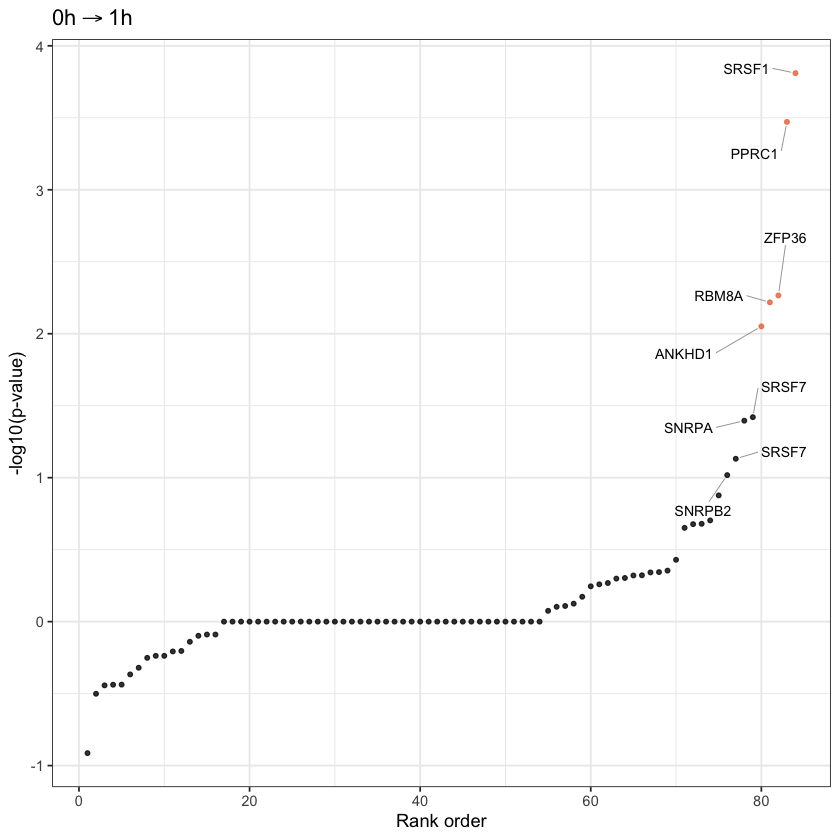

In [237]:
#pdf("RBP_enrichment_100nt_UPvsDN.pdf",width=6,height=4.5)
ggplot(df.ret,aes(x=order,y=y.log,label=rbp.name))+
  #geom_point(aes(colour=fe.ratio))+
  #scale_colour_gradientn(colours = yk.col(10)[1:10])
  #scale_colour_gradient( low = "#132B43", high = "#56B1F7",space = "Lab", na.value = "grey50", guide = "colourbar")
  geom_point(color = dplyr::case_when(abs(df.ret$adj.y.log) >0.7~ "#EE7447", 
                                      abs(df.ret$adj.y.log)<=0.7 ~ "black"), 
             size = 1, alpha = 0.8) +theme_bw()+
  geom_text_repel(data        = subset(df.ret, abs(y.log)>1),
                  #nudge_y       = -(5 - subset(df.ret, abs(y.log)>2)$y.log),
                  #nudge_x       = 150 - subset(df.ret, abs(adj.y.log)> 4)$order,
                  #nudge_x = 4.5 - subset(df.ret, abs(adj.y.log)> 4)$y.log,
                  size          = 3,
                  seed=40,
                  box.padding   = 1,
                  point.padding = 0.2,
                  #force.pull   = 1,
                  segment.size  = 0.2,
                  segment.color = "grey50",
                  direction     = "both")+xlab("Rank order")+labs(title = expression("0h"%->%"1h"))+ylab("-log10(p-value)")+theme(legend.position = "right")#+xlim(c(0,200))#+ylim(c(-3,16))
dev.off() 

In [83]:
getwd()

[1] "/Users/yeonuikwak/Desktop/2021_Grimsonlab/RNA_Revision/reviewer2/Request5/Rcode/step10_Fig7G_RBP"